## Function Transformer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("/home/yash/Downloads/Titanic.csv")
df = df[["Survived","Age","Fare"]]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
# fill missing value by that's mean

In [4]:
x = df.drop(["Survived"],axis = 1)
y = df["Survived"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


Text(0.5, 1.0, 'Age QQ Plot')

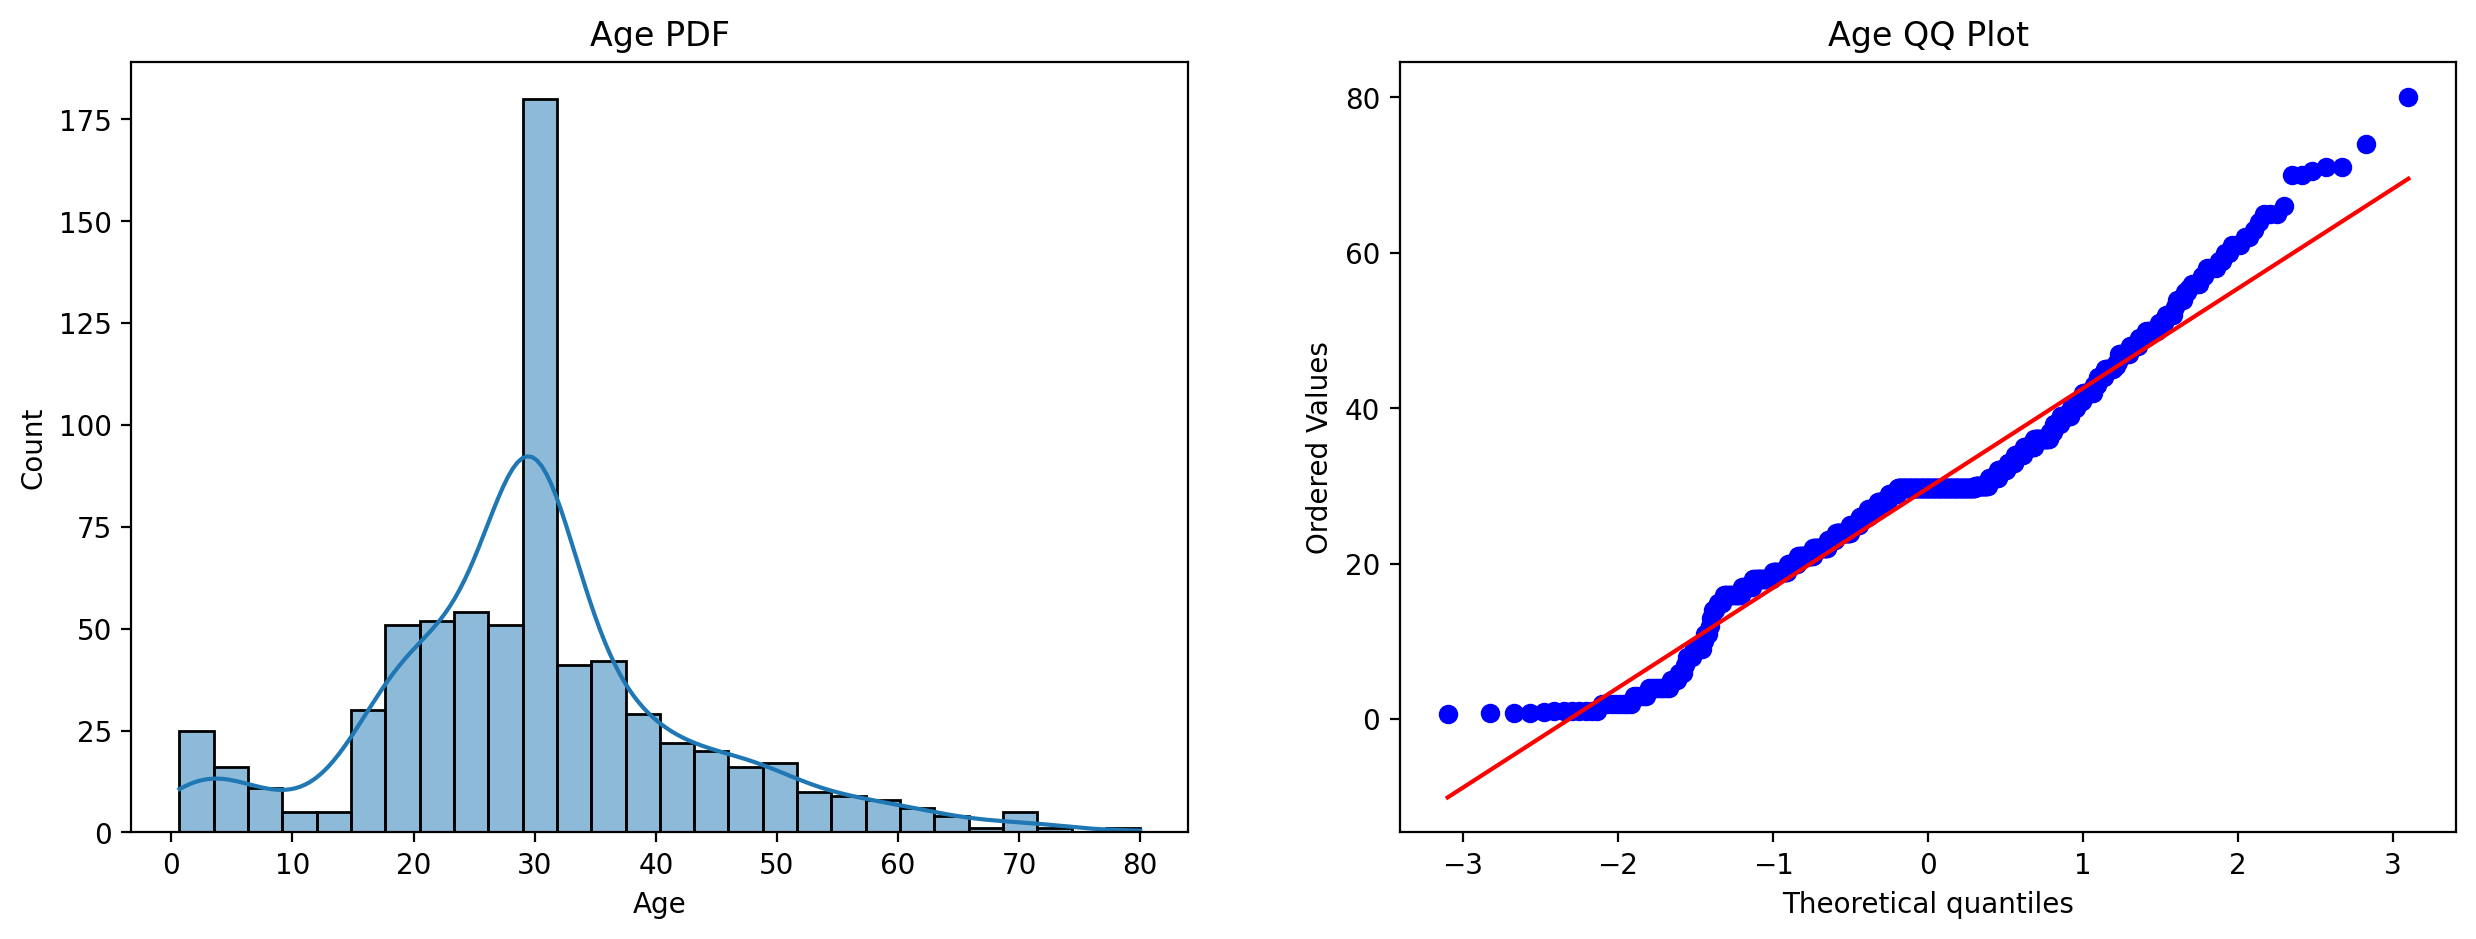

In [6]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,2,1)
sns.histplot(x_train["Age"], kde = True)
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(x_train["Age"],dist = "norm", plot = plt)
plt.title("Age QQ Plot")

Text(0.5, 1.0, 'Fare QQ Plot')

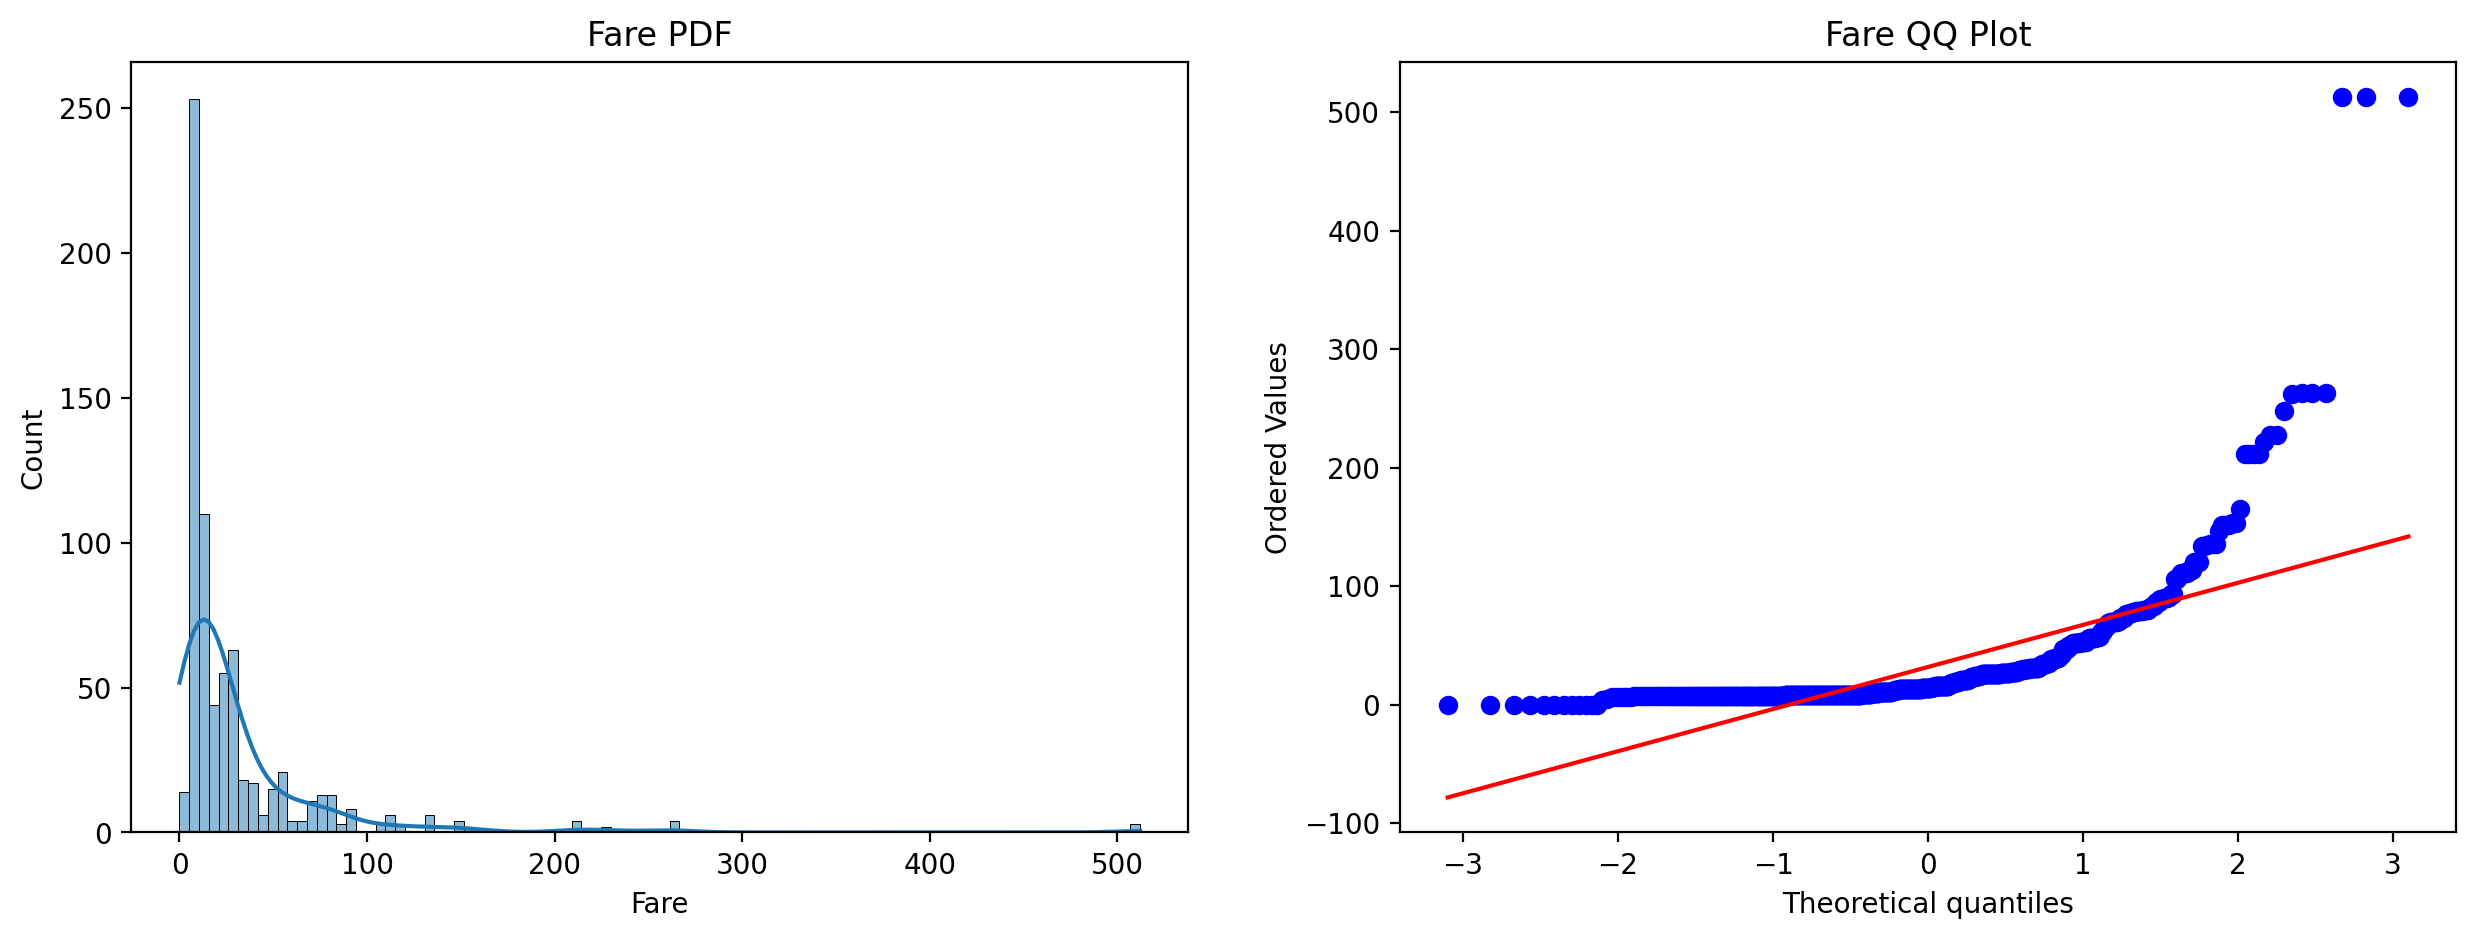

In [7]:
plt.figure(figsize = (15,5),dpi = 200)

plt.subplot(1,2,1)
sns.histplot(x_train["Fare"], kde = True)
plt.title("Fare PDF")

plt.subplot(1,2,2)
stats.probplot(x_train["Fare"],dist = "norm", plot = plt)
plt.title("Fare QQ Plot")

In [8]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Acuracy Score by LR : ",accuracy_score(y_test,y_pred1)*100,"%")
print("Acuracy Score by DTC : ",accuracy_score(y_test,y_pred2)*100,"%")

Acuracy Score by LR :  69.83240223463687 %
Acuracy Score by DTC :  68.15642458100558 %


### Transform Both Column ( Age , Fare )

In [9]:
trf = FunctionTransformer(func = np.log1p)

trf.fit(x_train)
x_train_trf = trf.transform(x_train)
x_test_trf = trf.transform(x_test)


Text(0.5, 1.0, 'After Transformer Age QQ Plot')

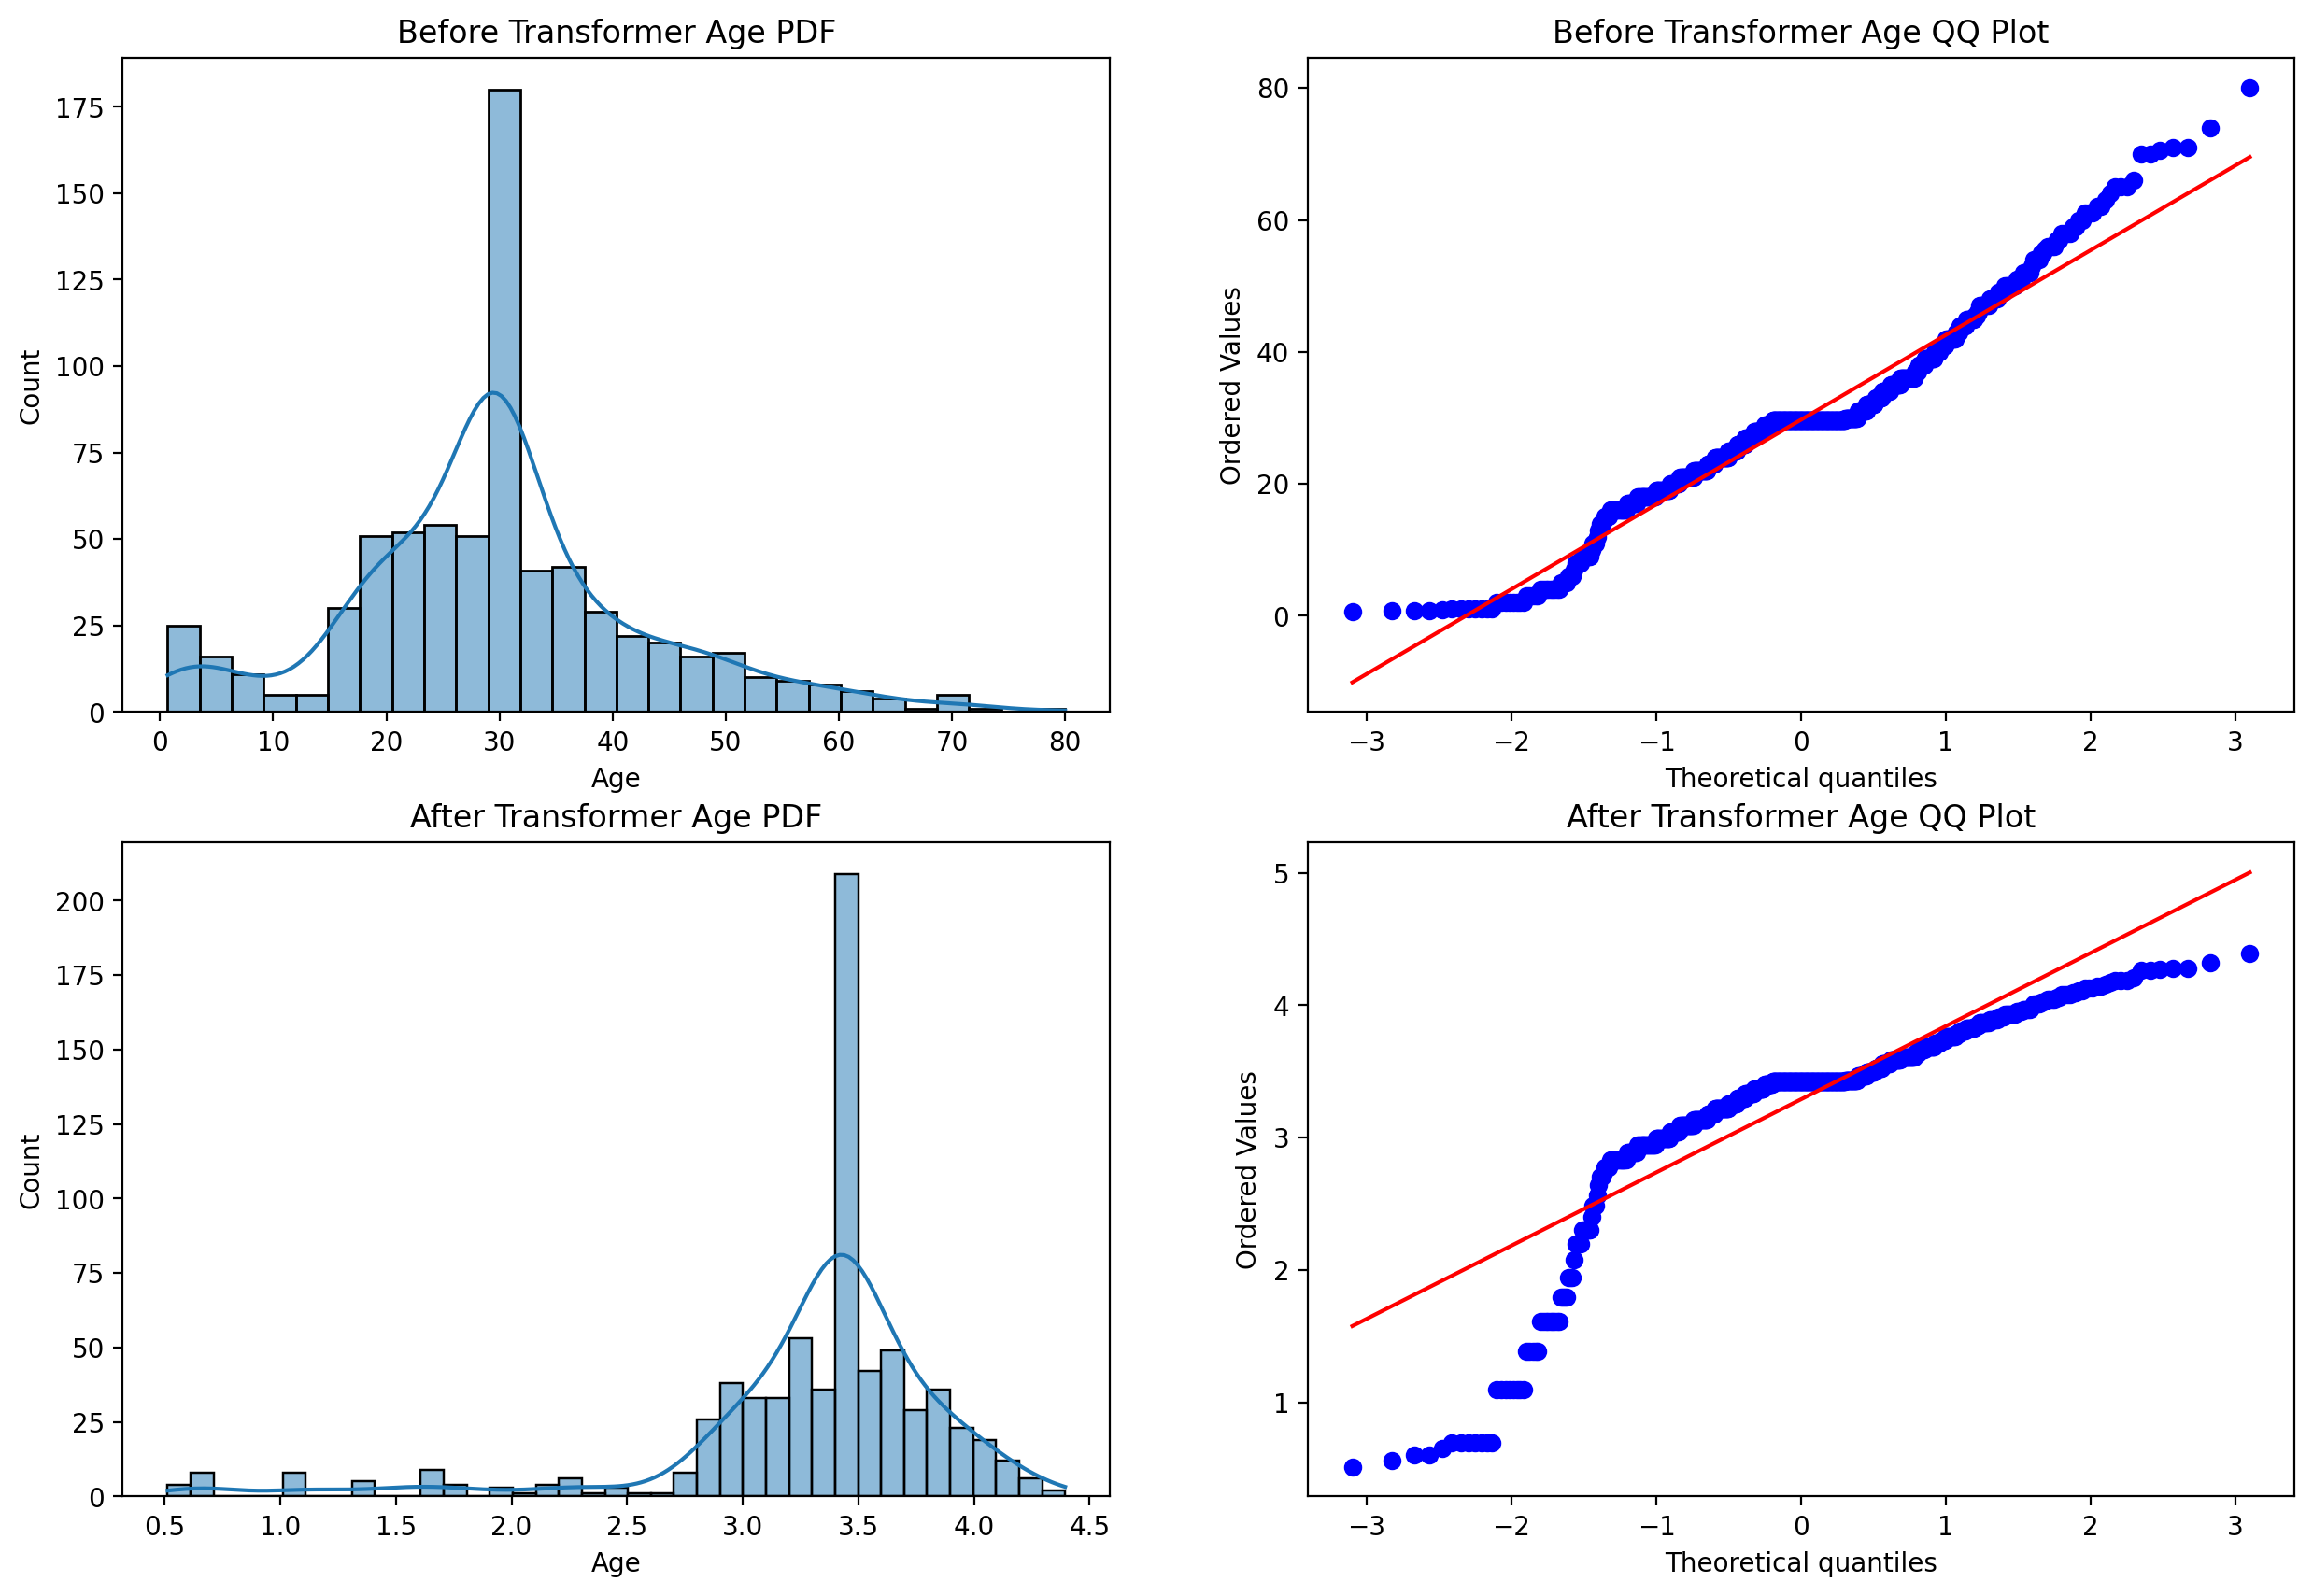

In [10]:
plt.figure(figsize = (15,10),dpi = 200)

plt.subplot(2,2,1)
sns.histplot(x_train["Age"], kde = True)
plt.title("Before Transformer Age PDF")

plt.subplot(2,2,2)
stats.probplot(x_train["Age"],dist = "norm", plot = plt)
plt.title("Before Transformer Age QQ Plot")

plt.subplot(2,2,3)
sns.histplot(x_train_trf["Age"], kde = True)
plt.title("After Transformer Age PDF")

plt.subplot(2,2,4)
stats.probplot(x_train_trf["Age"],dist = "norm", plot = plt)
plt.title("After Transformer Age QQ Plot")


Text(0.5, 1.0, 'After Transformer ssssFare QQ Plot')

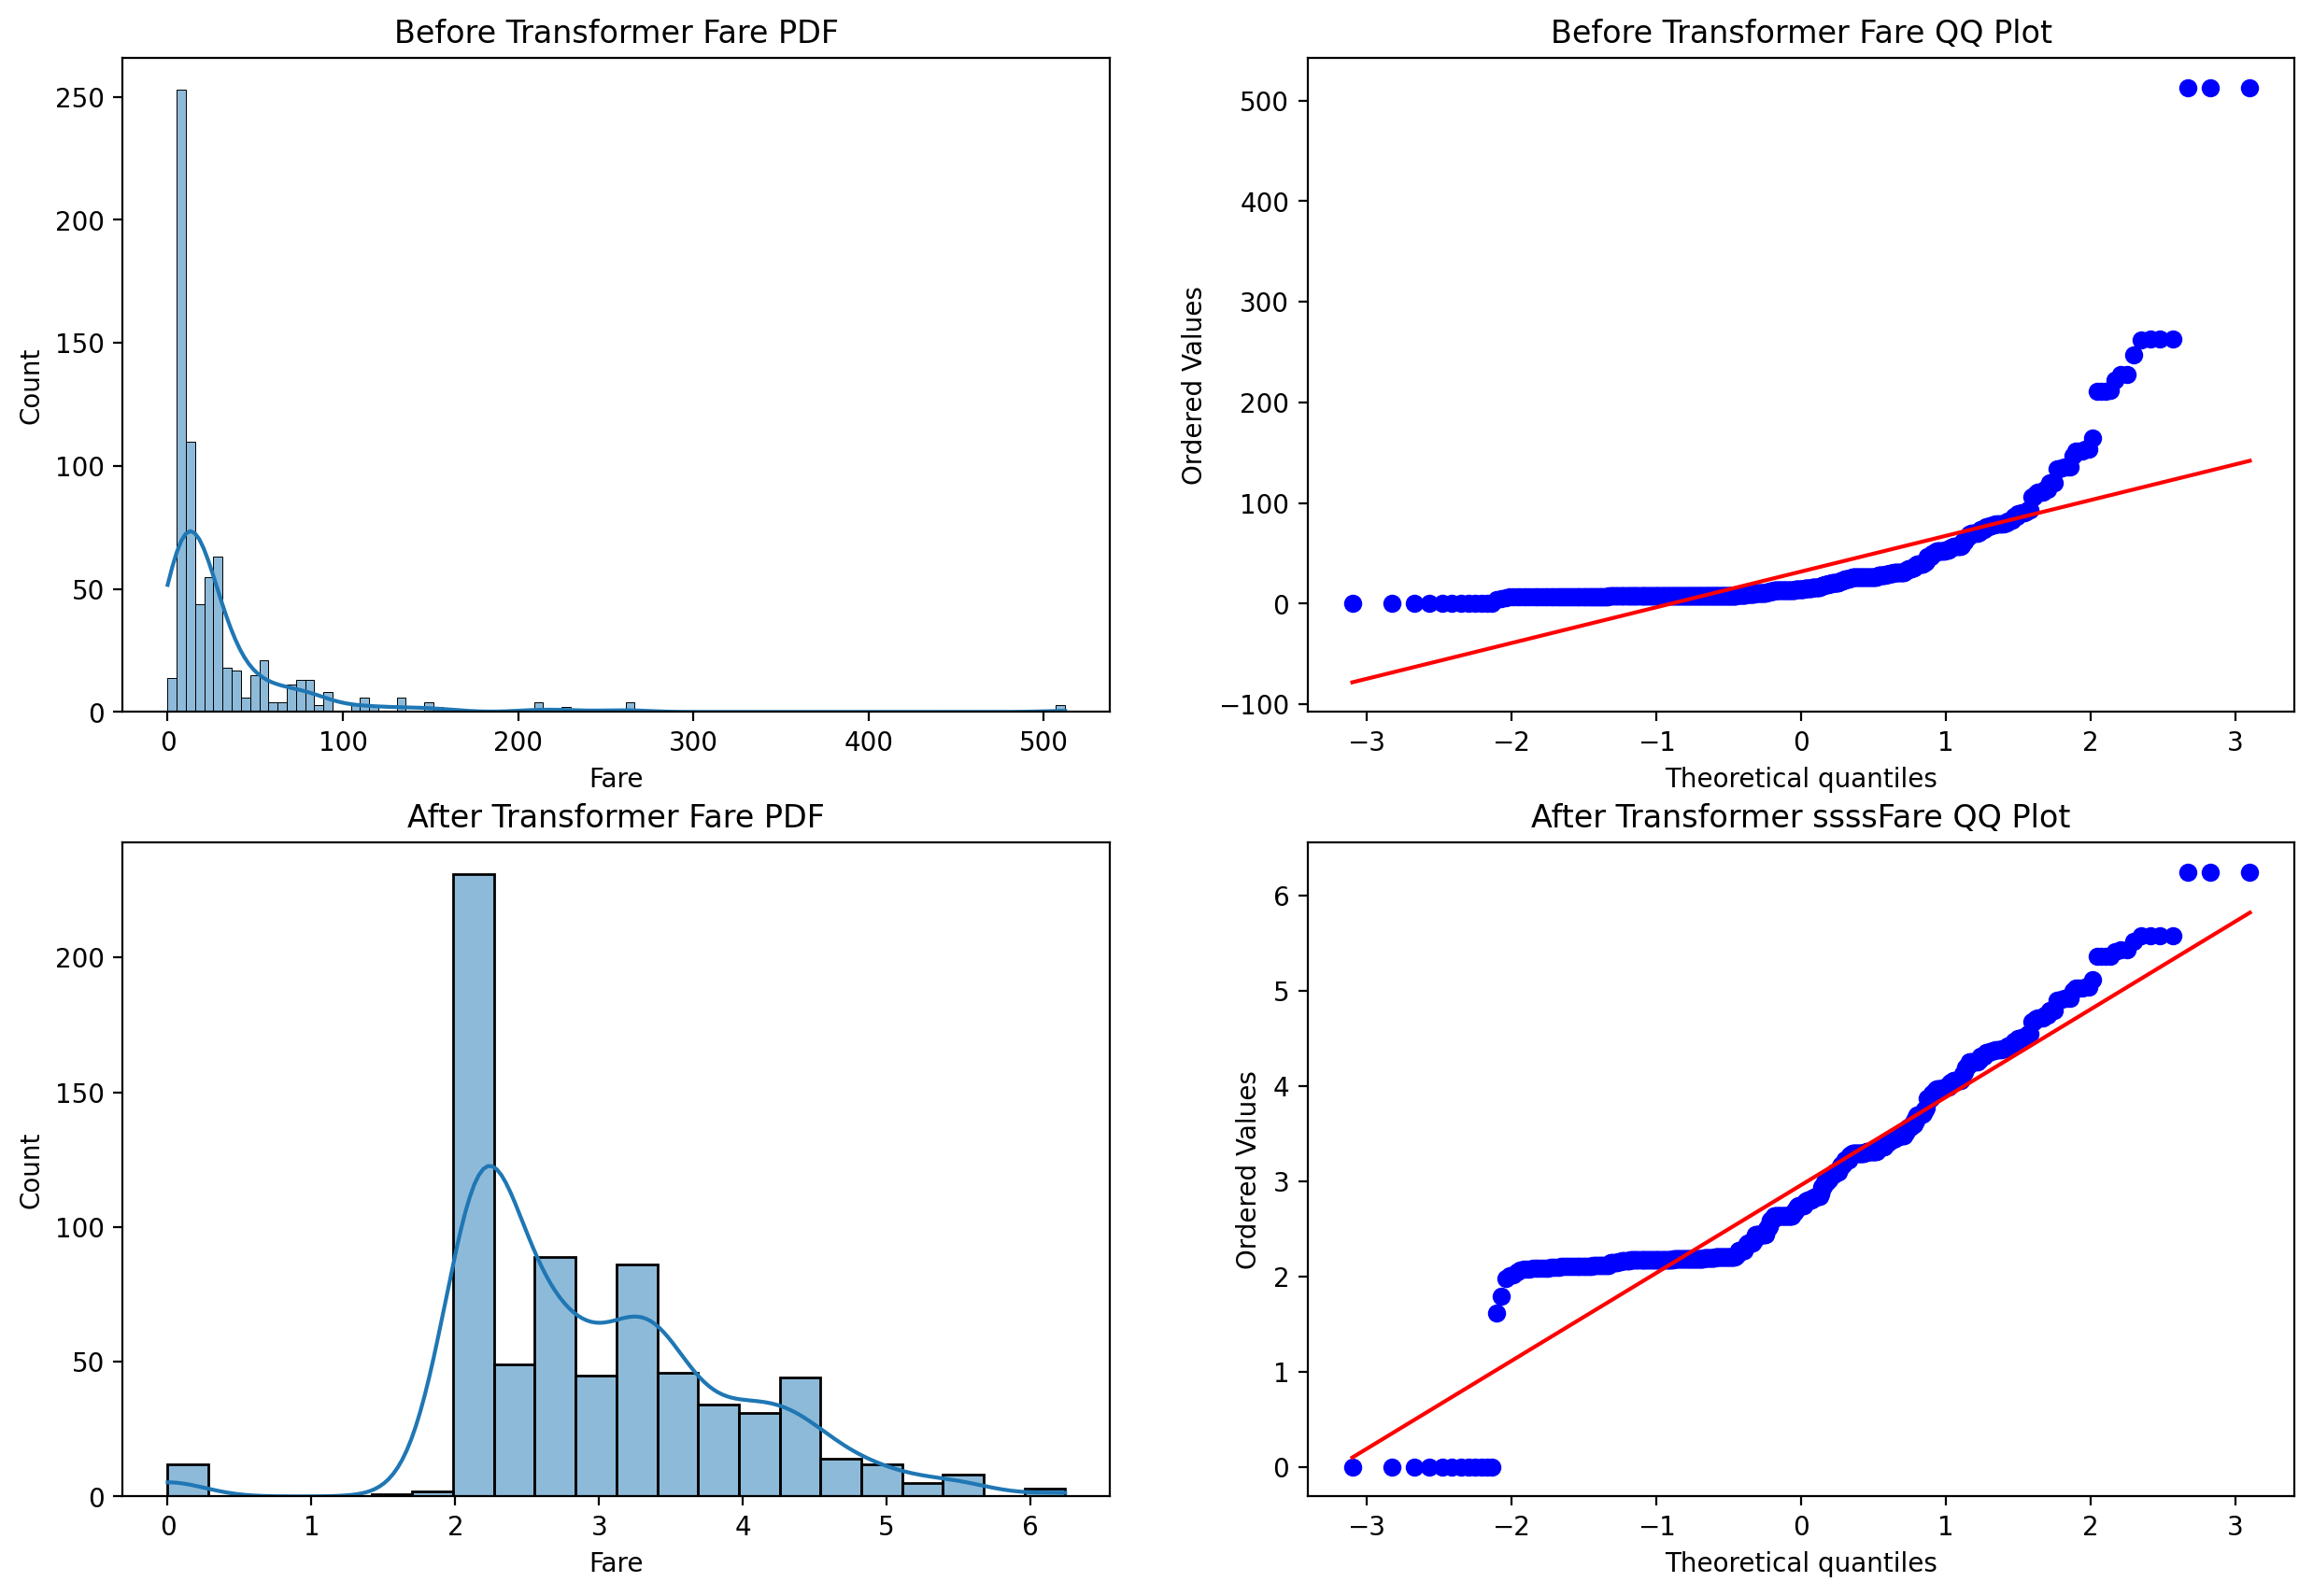

In [11]:
plt.figure(figsize = (15,10),dpi = 200)

plt.subplot(2,2,1)
sns.histplot(x_train["Fare"], kde = True)
plt.title("Before Transformer Fare PDF")

plt.subplot(2,2,2)
stats.probplot(x_train["Fare"],dist = "norm", plot = plt)
plt.title("Before Transformer Fare QQ Plot")

plt.subplot(2,2,3)
sns.histplot(x_train_trf["Fare"], kde = True)
plt.title("After Transformer Fare PDF")

plt.subplot(2,2,4)
stats.probplot(x_train_trf["Fare"],dist = "norm", plot = plt)
plt.title("After Transformer ssssFare QQ Plot")

In [12]:
clf1.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred1 = clf1.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

print("Acuracy Score After Transformer by LR : ",accuracy_score(y_test,y_pred1)*100,"%")
print("Acuracy Score After Transformer by DTC : ",accuracy_score(y_test,y_pred2)*100,"%")

Acuracy Score After Transformer by LR :  70.39106145251397 %
Acuracy Score After Transformer by DTC :  66.4804469273743 %


### Transform Only Fare Column

In [13]:
trf = ColumnTransformer(transformers = [
    ("Log", FunctionTransformer(func = np.log1p) ,["Fare"])
],remainder = "passthrough")
trf.fit(x_train)
x_train_trf = trf.transform(x_train)
x_test_trf = trf.transform(x_test)

x_train_trf = pd.DataFrame(x_train_trf)
x_train_trf.columns = ["Fare","Age"]

x_test_trf = pd.DataFrame(x_test_trf)
x_test_trf.columns = ["Fare","Age"]

Text(0.5, 1.0, 'After Transformer ssssFare QQ Plot')

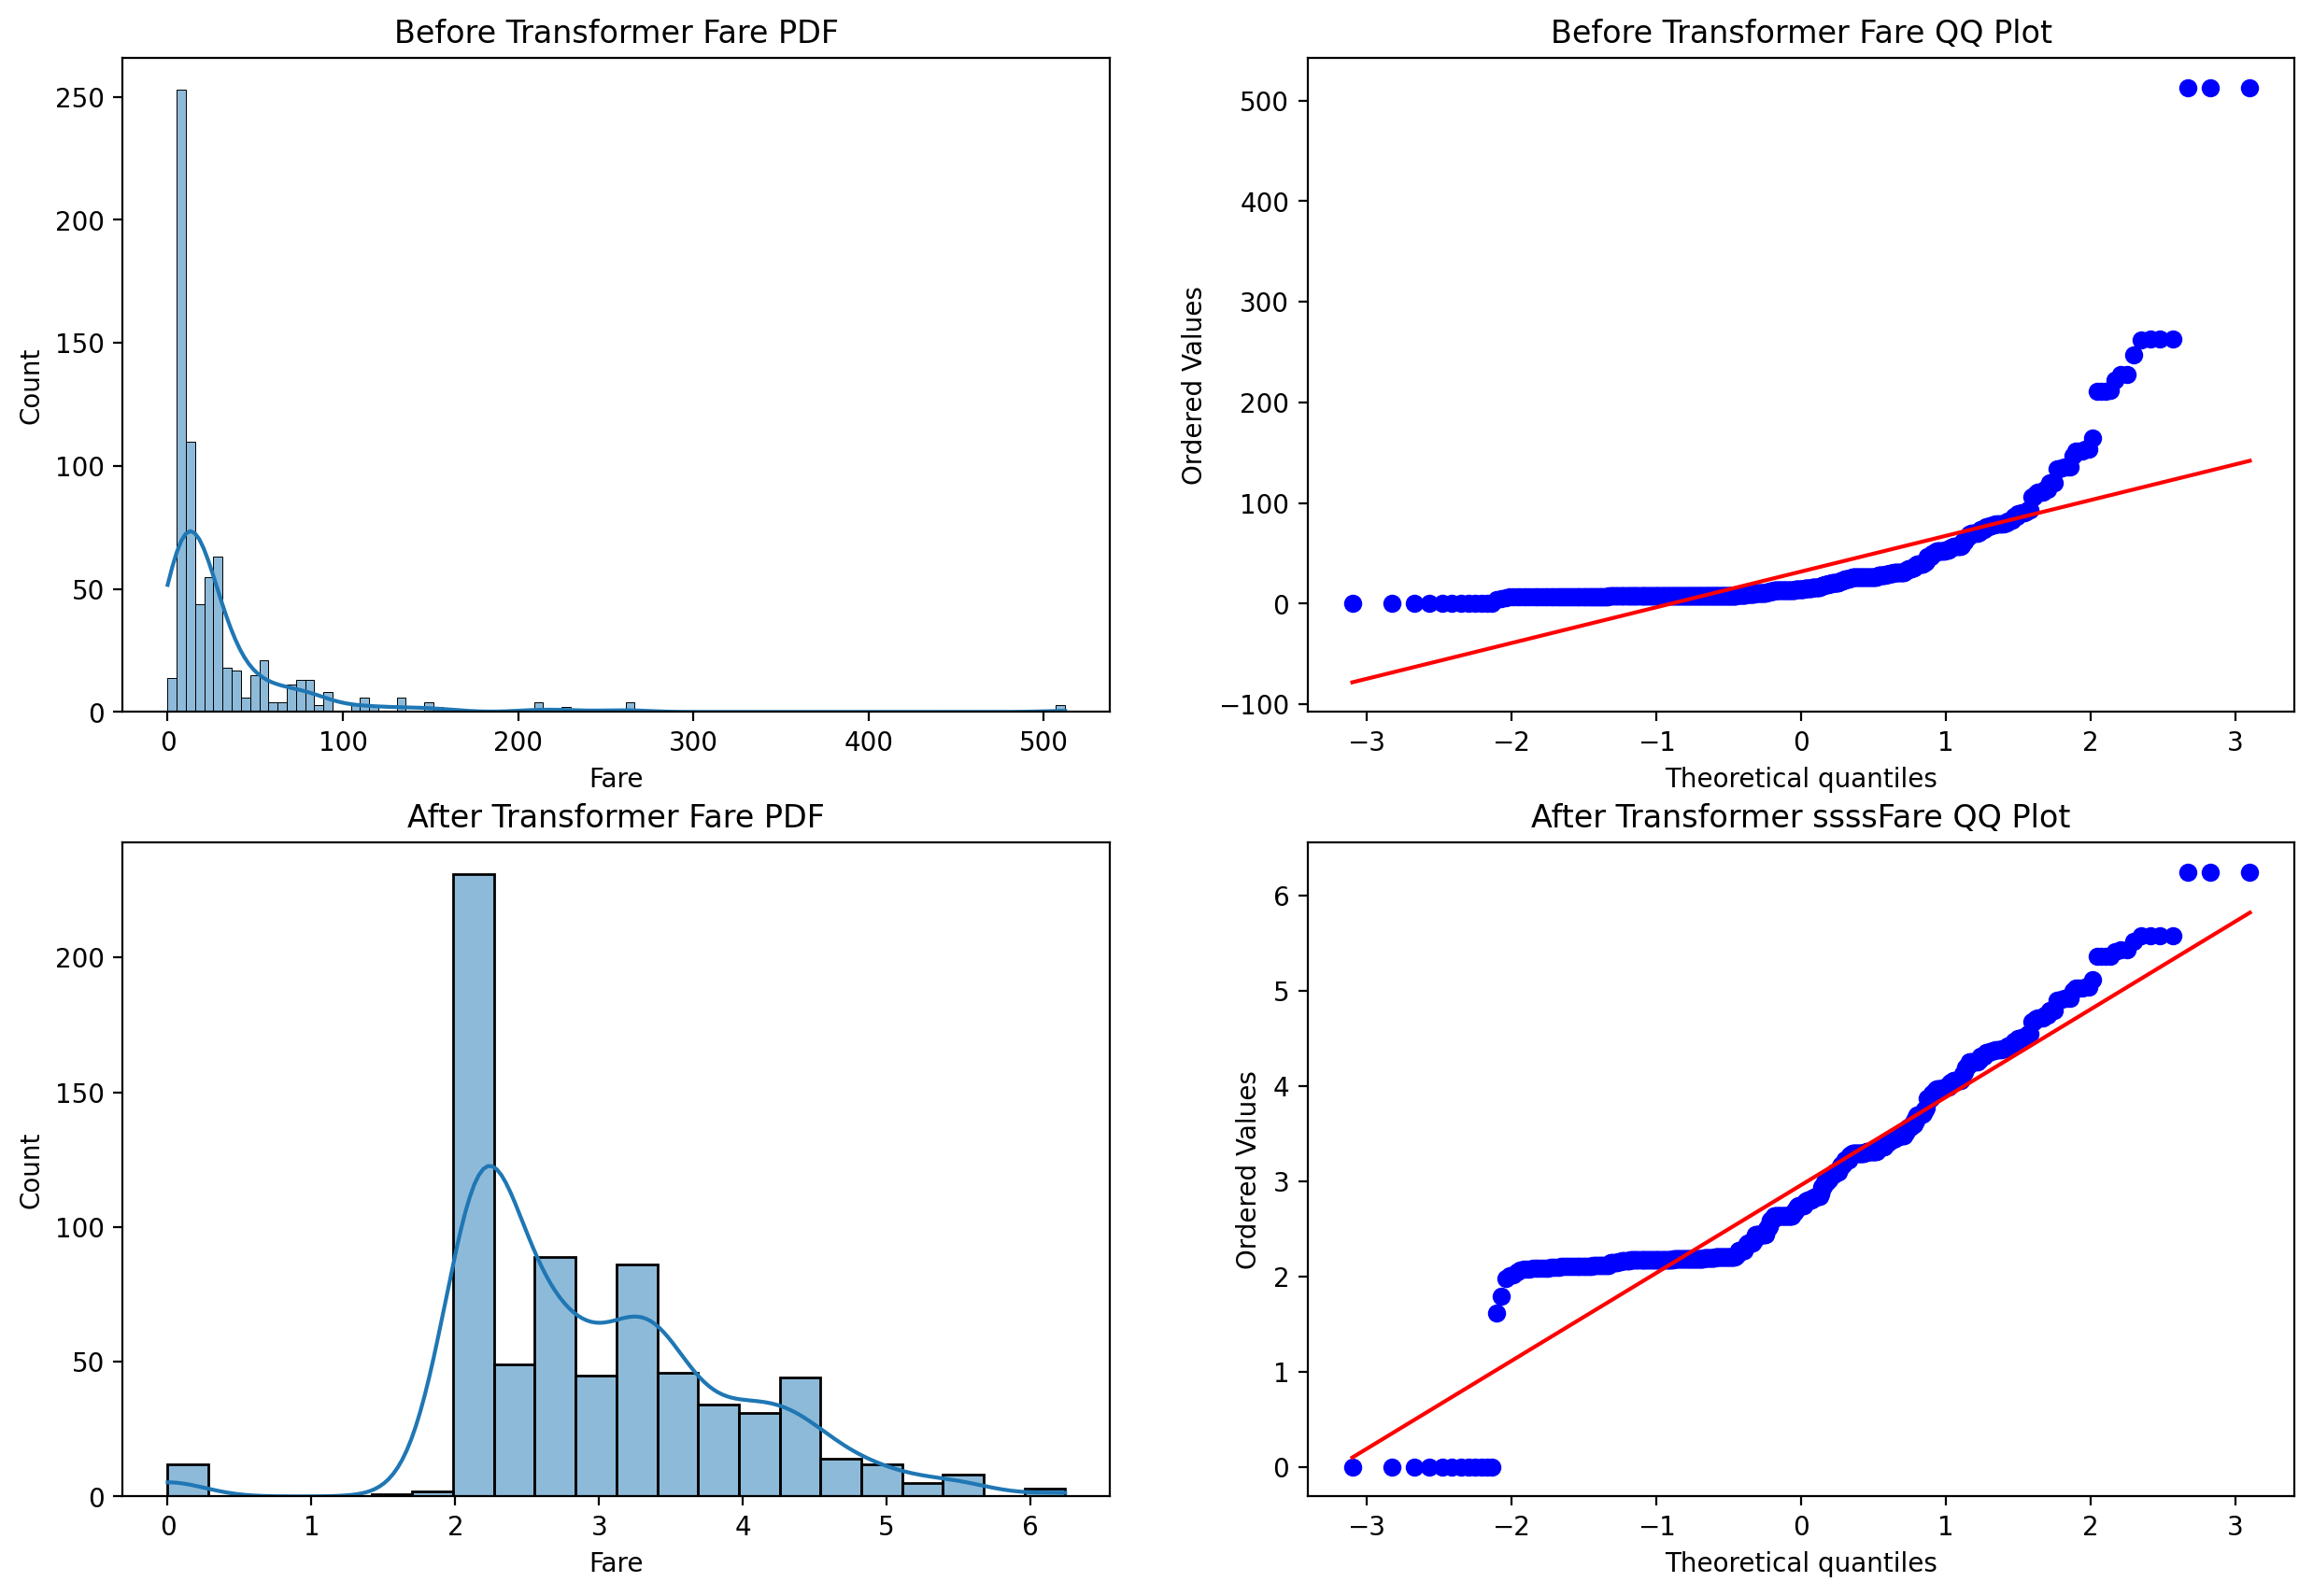

In [14]:
plt.figure(figsize = (15,10),dpi = 200)

plt.subplot(2,2,1)
sns.histplot(x_train["Fare"], kde = True)
plt.title("Before Transformer Fare PDF")

plt.subplot(2,2,2)
stats.probplot(x_train["Fare"],dist = "norm", plot = plt)
plt.title("Before Transformer Fare QQ Plot")

plt.subplot(2,2,3)
sns.histplot(x_train_trf["Fare"], kde = True)
plt.title("After Transformer Fare PDF")

plt.subplot(2,2,4)
stats.probplot(x_train_trf["Fare"],dist = "norm", plot = plt)
plt.title("After Transformer ssssFare QQ Plot")

In [15]:
clf1.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred1 = clf1.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

print("Acuracy Score After Transformer(Only Fare) by LR : ",accuracy_score(y_test,y_pred1)*100,"%")
print("Acuracy Score After Transformer(Only Fare) by DTC : ",accuracy_score(y_test,y_pred2)*100,"%")

Acuracy Score After Transformer(Only Fare) by LR :  68.15642458100558 %
Acuracy Score After Transformer(Only Fare) by DTC :  67.0391061452514 %


## Power Transformer

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [18]:
df = pd.read_csv("/home/yash/Downloads/concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [20]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = "Strength"),df["Strength"],test_size = 0.1,random_state = 0)

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
r2_score(y_test,y_pred1)*100

61.30673777738751

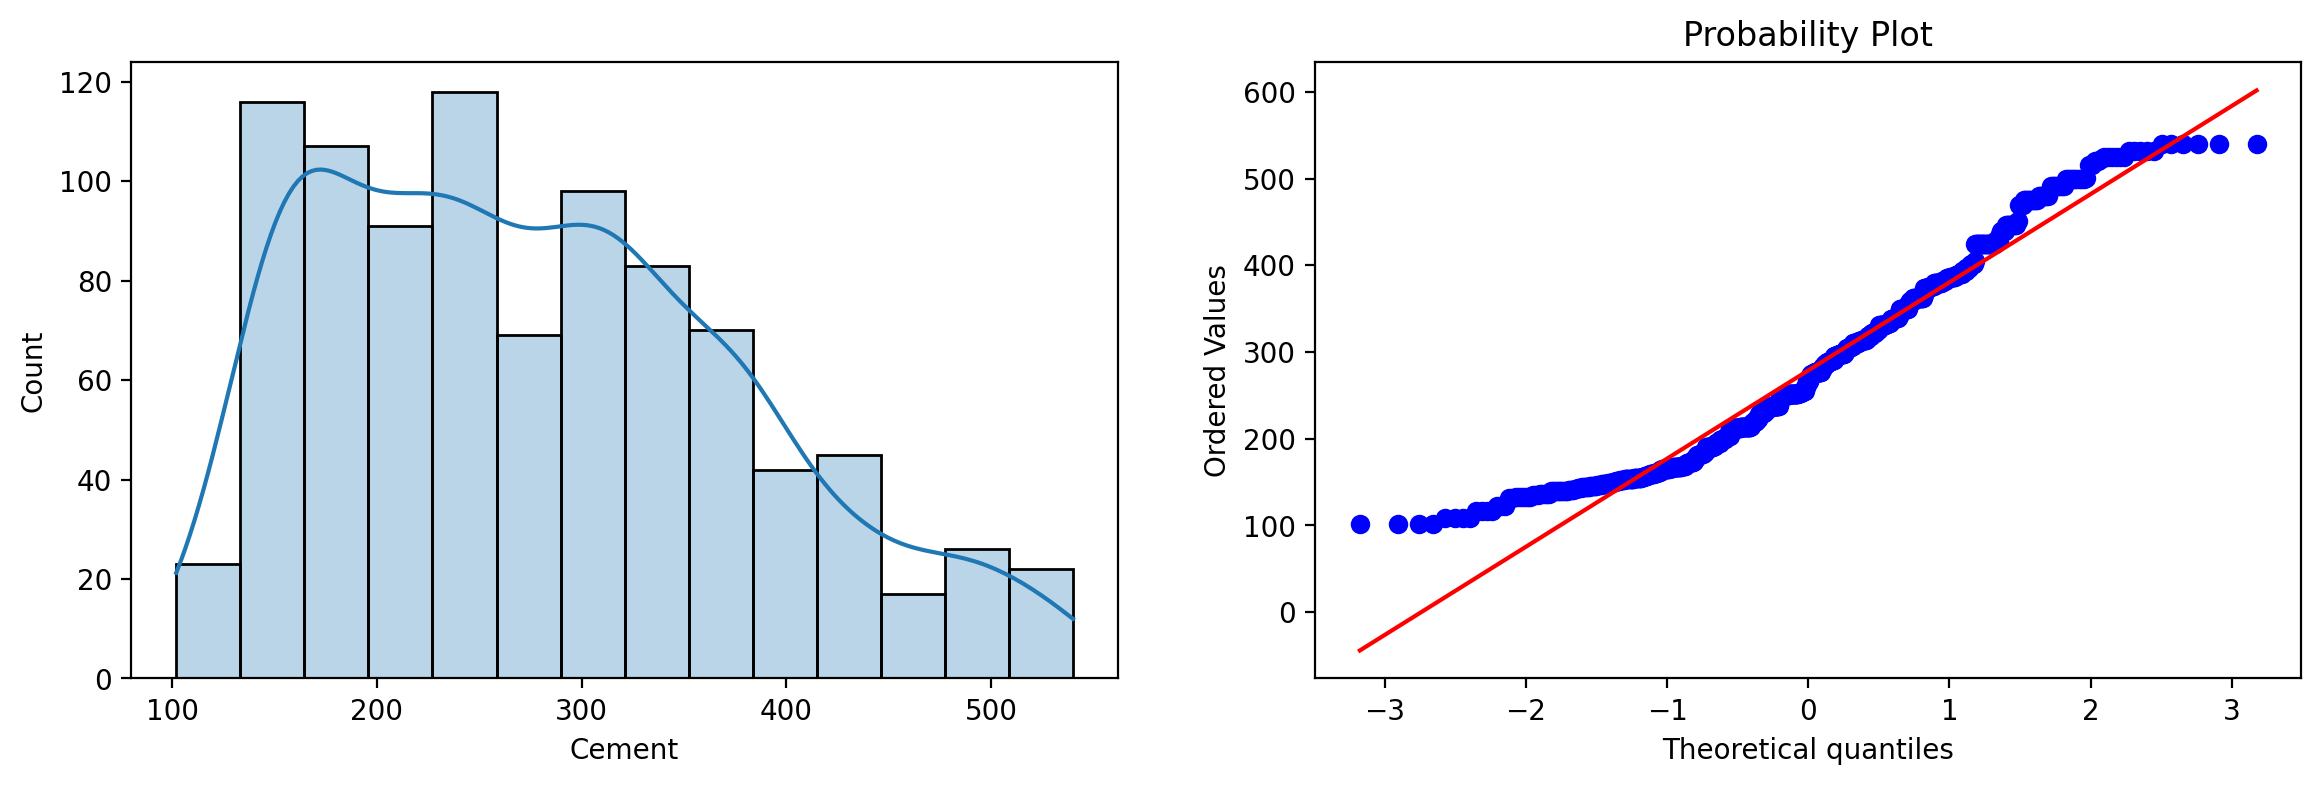

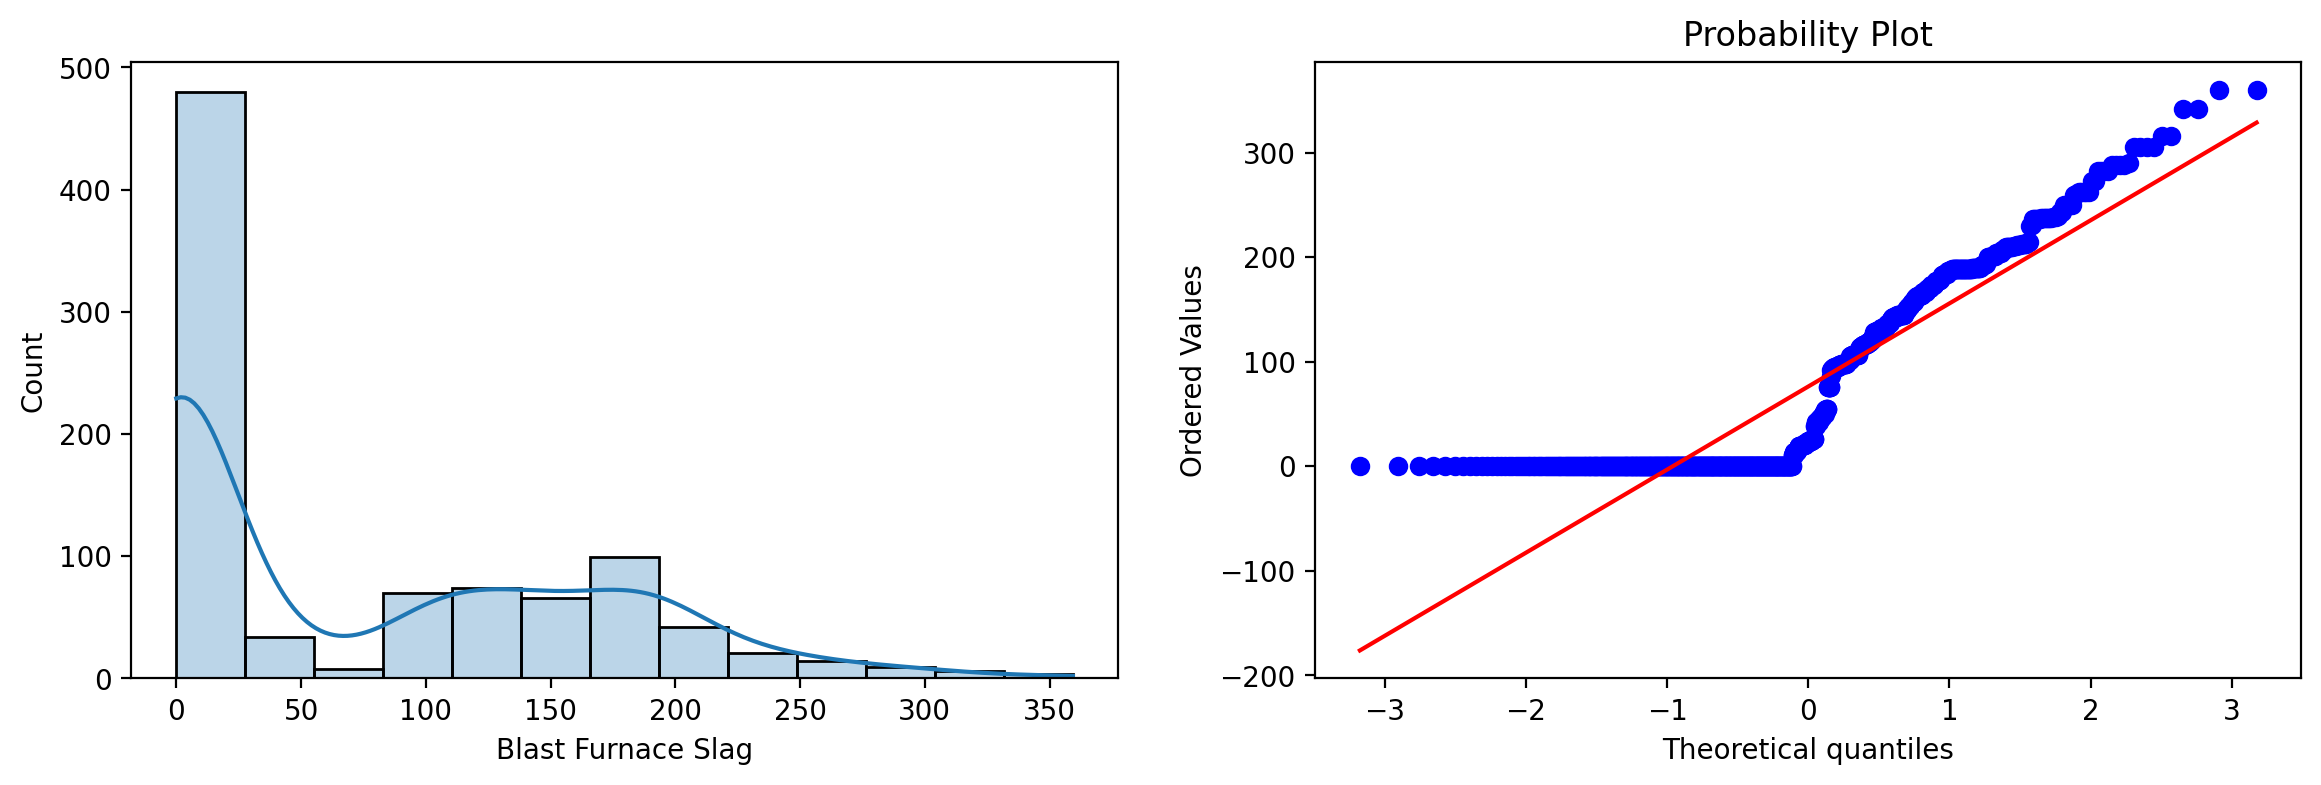

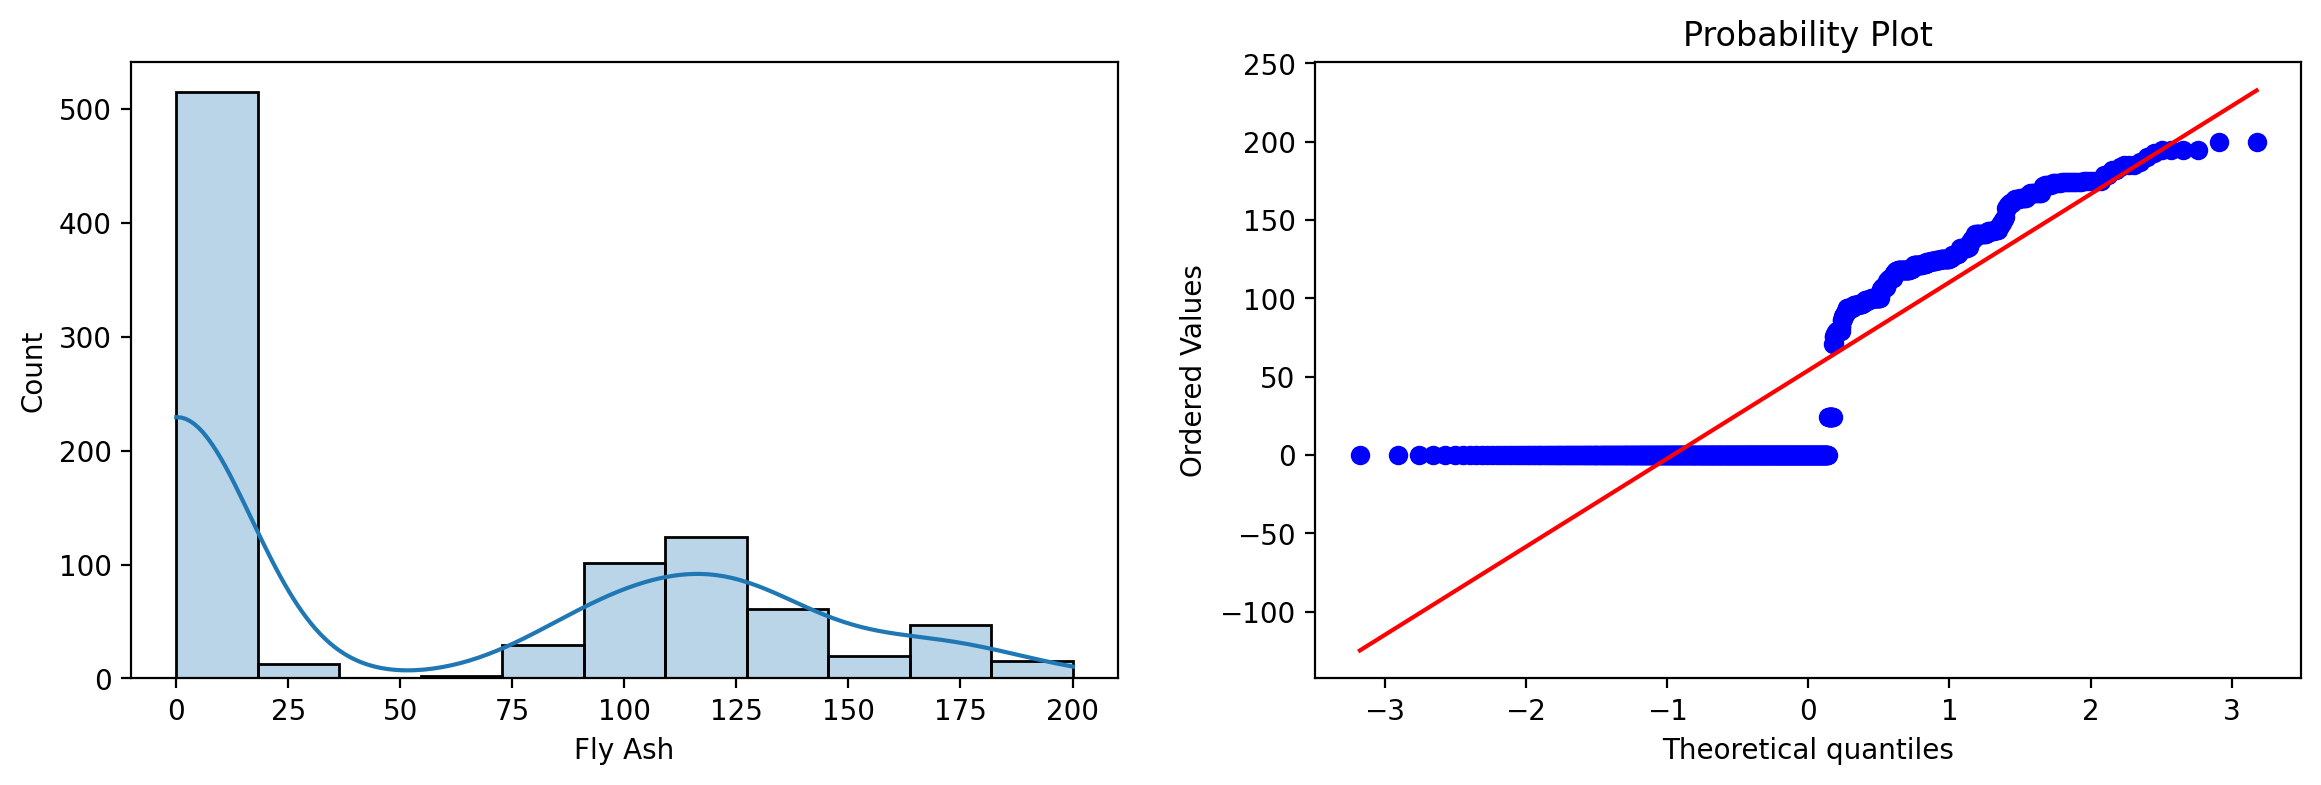

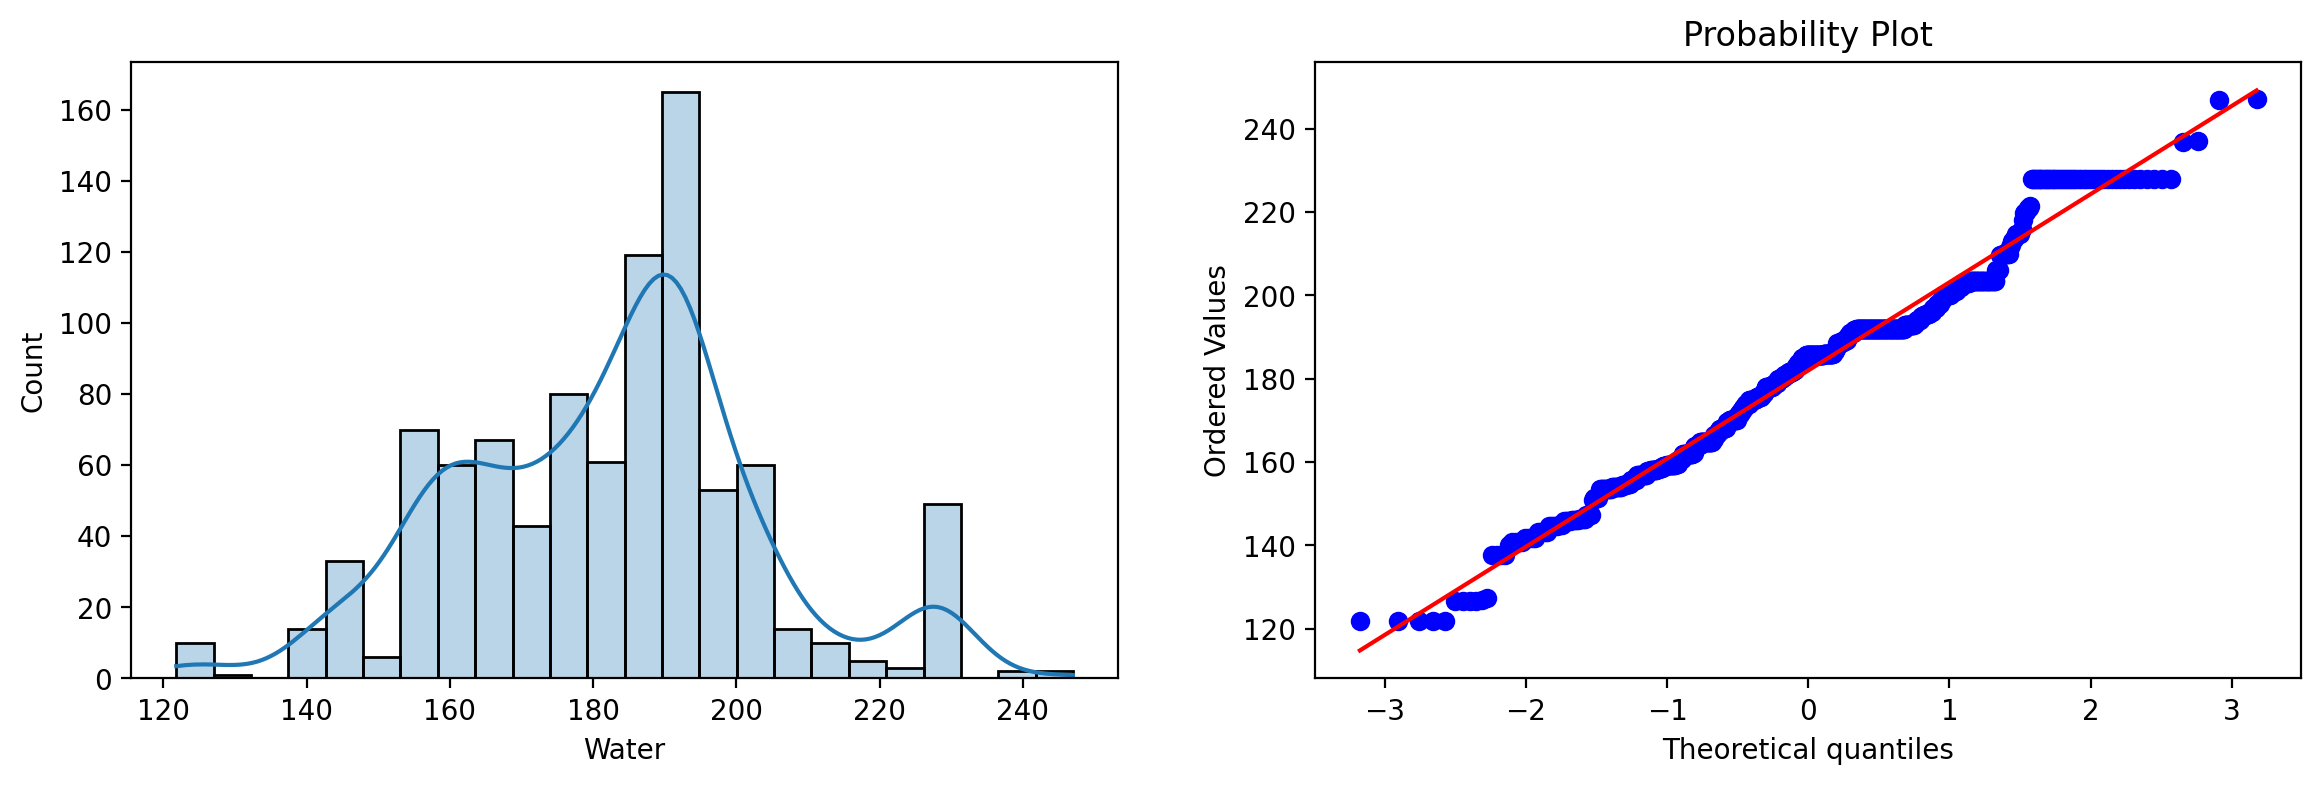

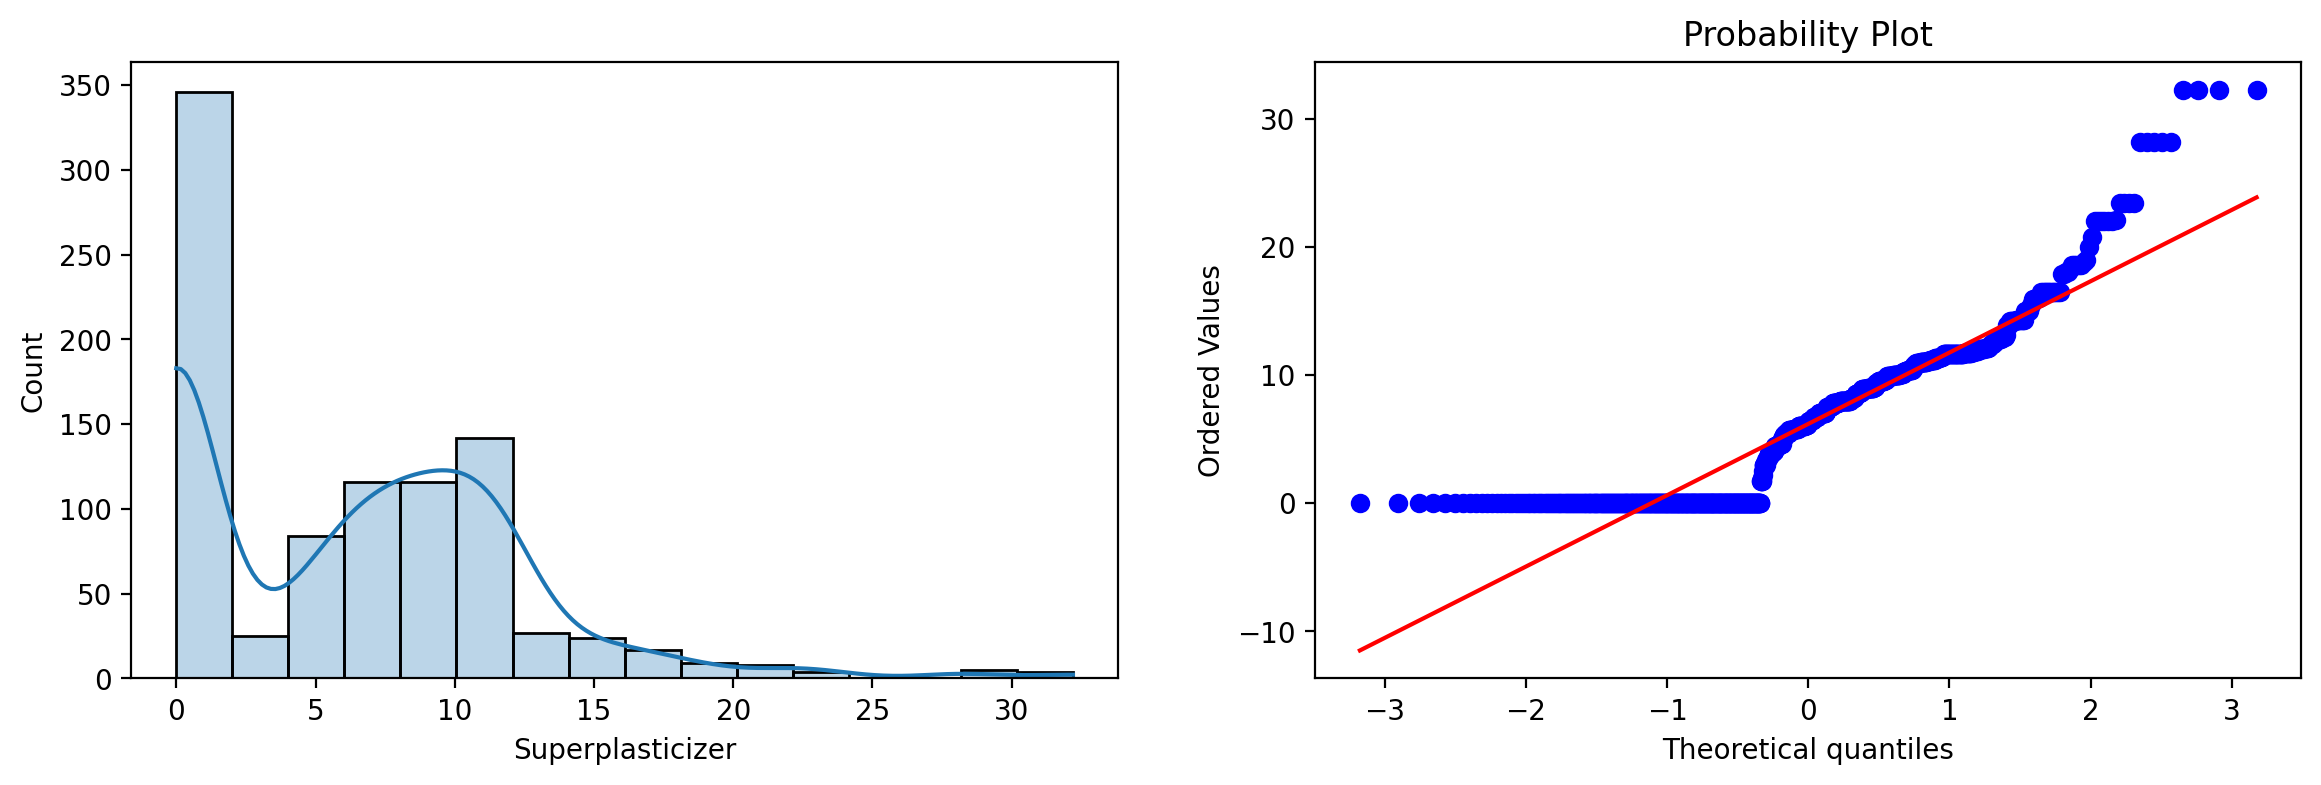

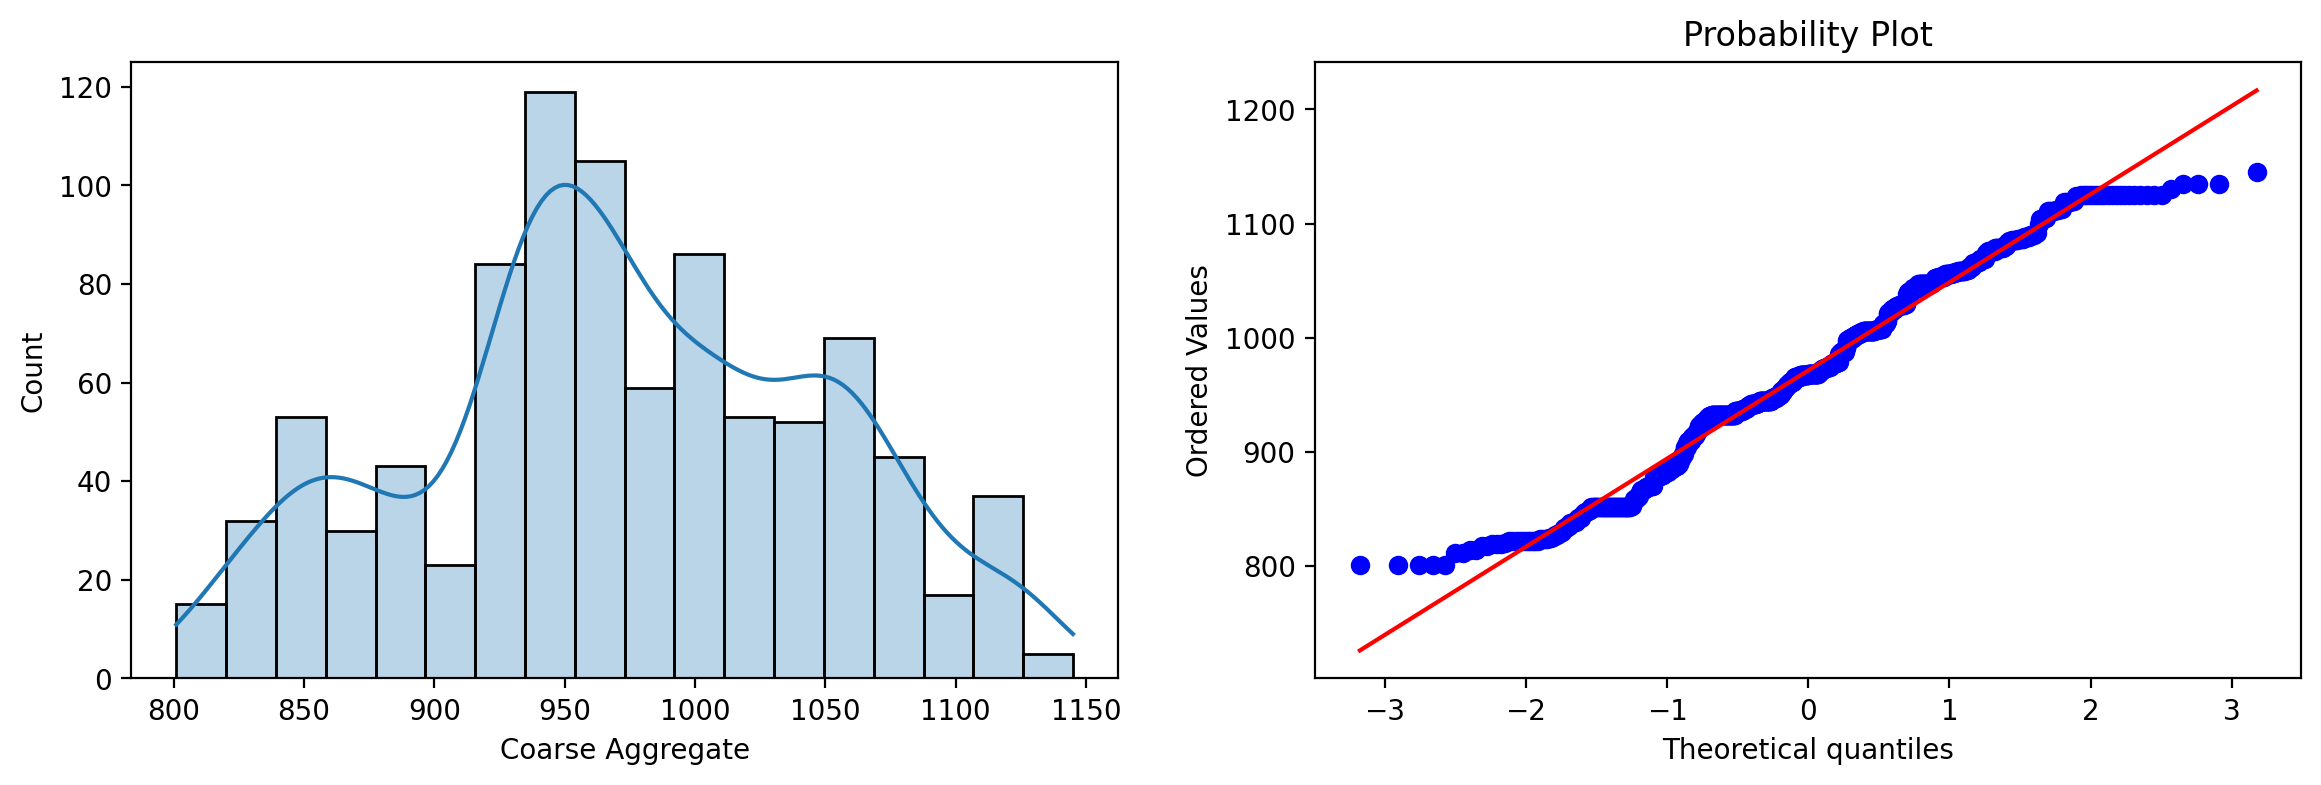

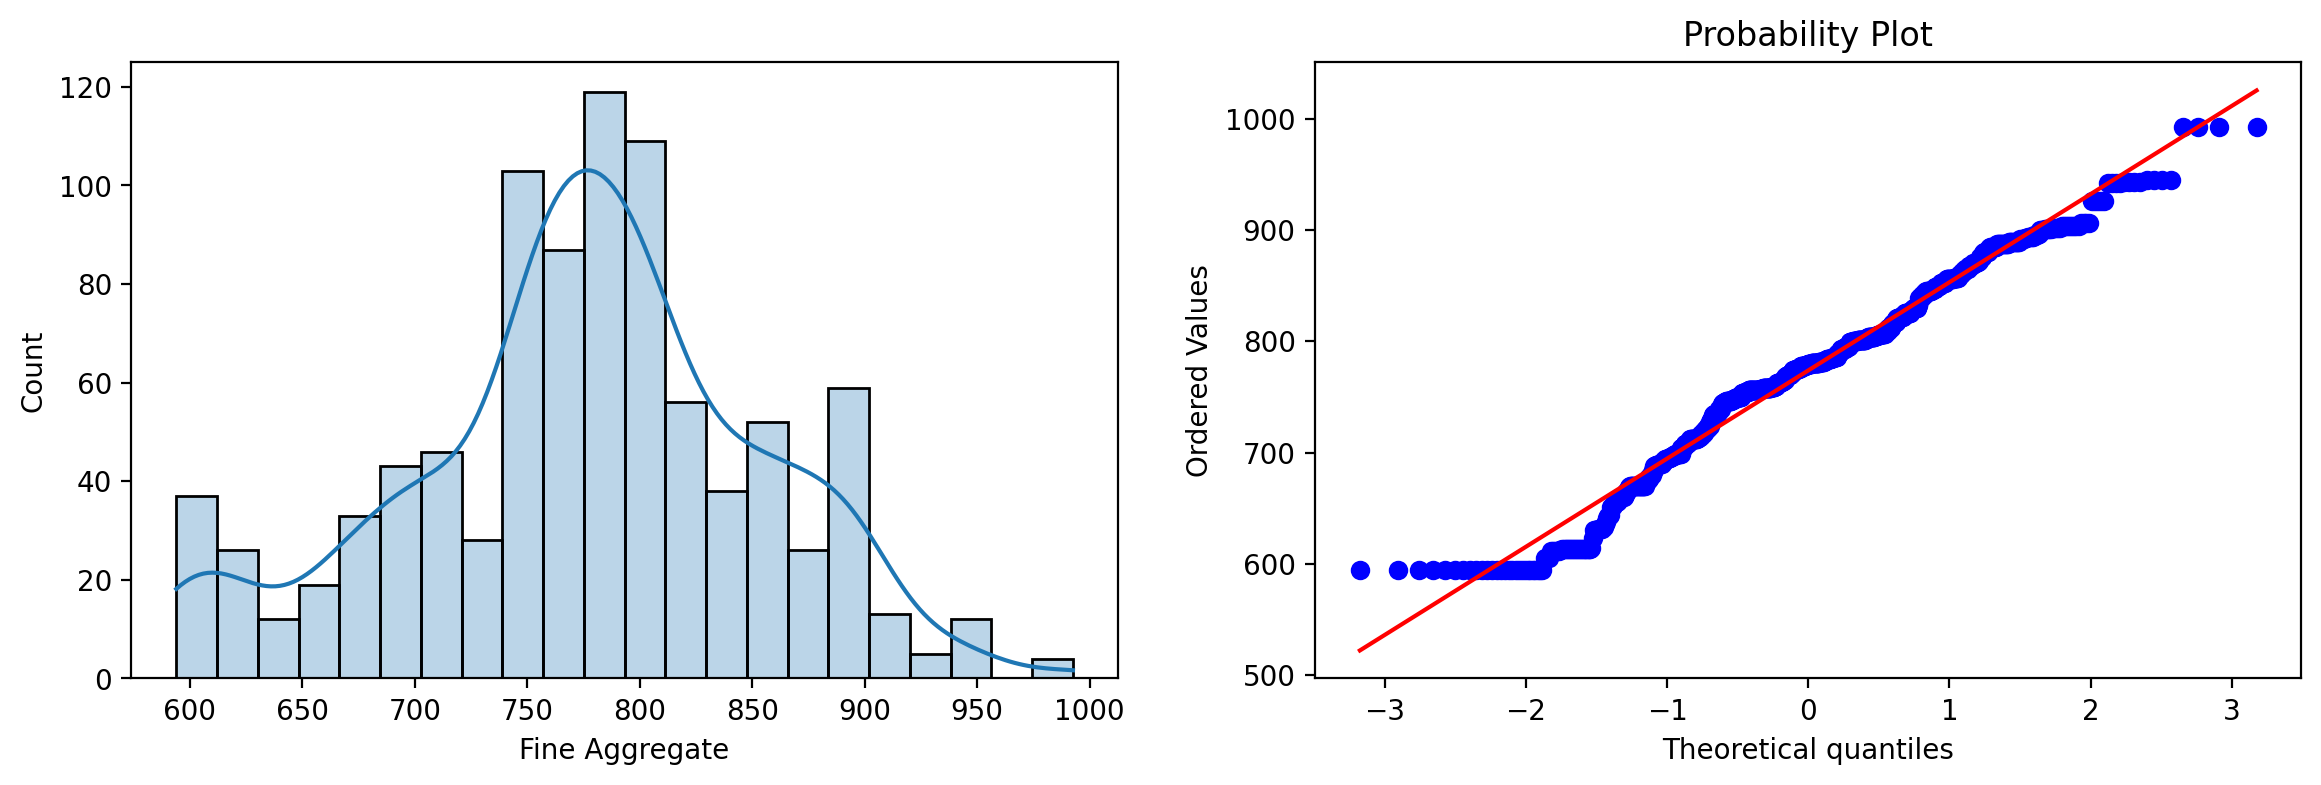

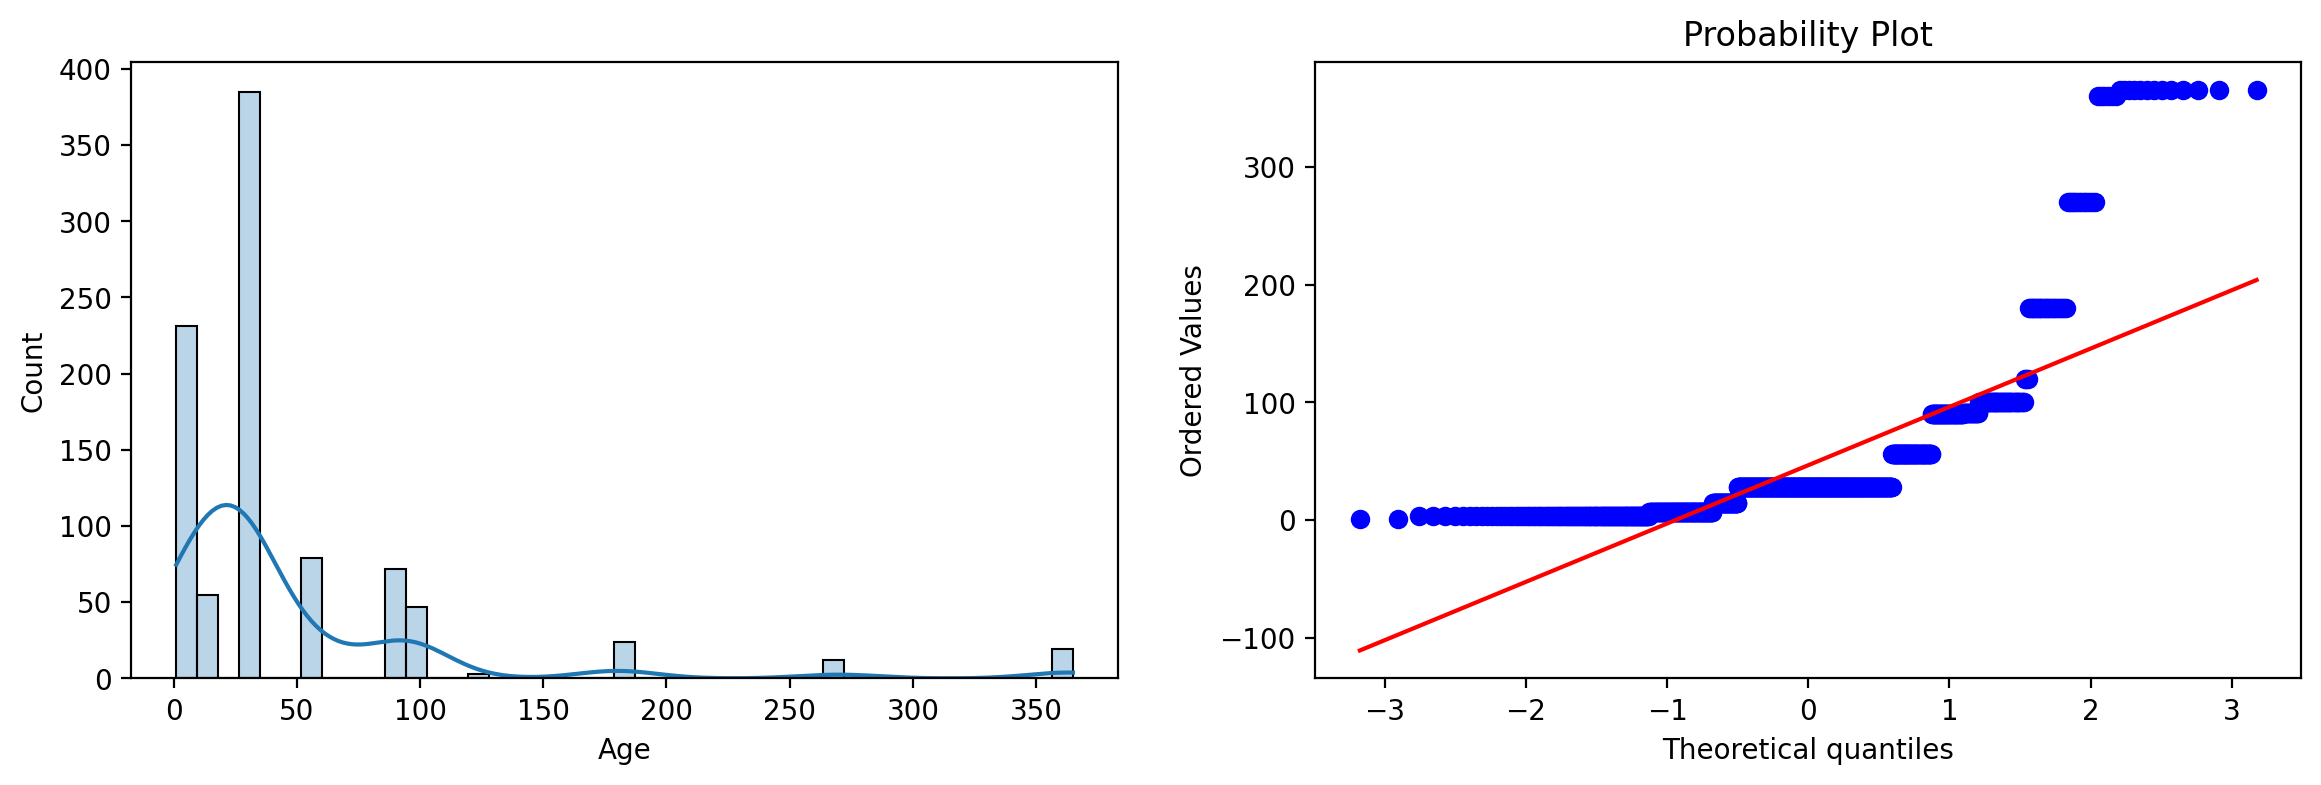

In [22]:
for col in x_train.columns:
    plt.figure(figsize = (14,4),dpi = 200)
    plt.subplot(1,2,1)
    sns.histplot( x_train[col],kde = True,alpha = 0.3)
    
    plt.subplot(1,2,2)
    stats.probplot(x_train[col],dist = "norm", plot = plt)

In [23]:
# Applying Box-Cox Transform

pt = PowerTransformer(method = "box-cox")
pt.fit(x_train+0.000001)
x_train_trf = pt.transform(x_train+0.000001)
x_test_trf = pt.transform(x_test+0.000001)

x_train_trf = pd.DataFrame(x_train_trf,columns = x_train.columns)
x_test_trf = pd.DataFrame(x_test_trf,columns = x_test.columns)

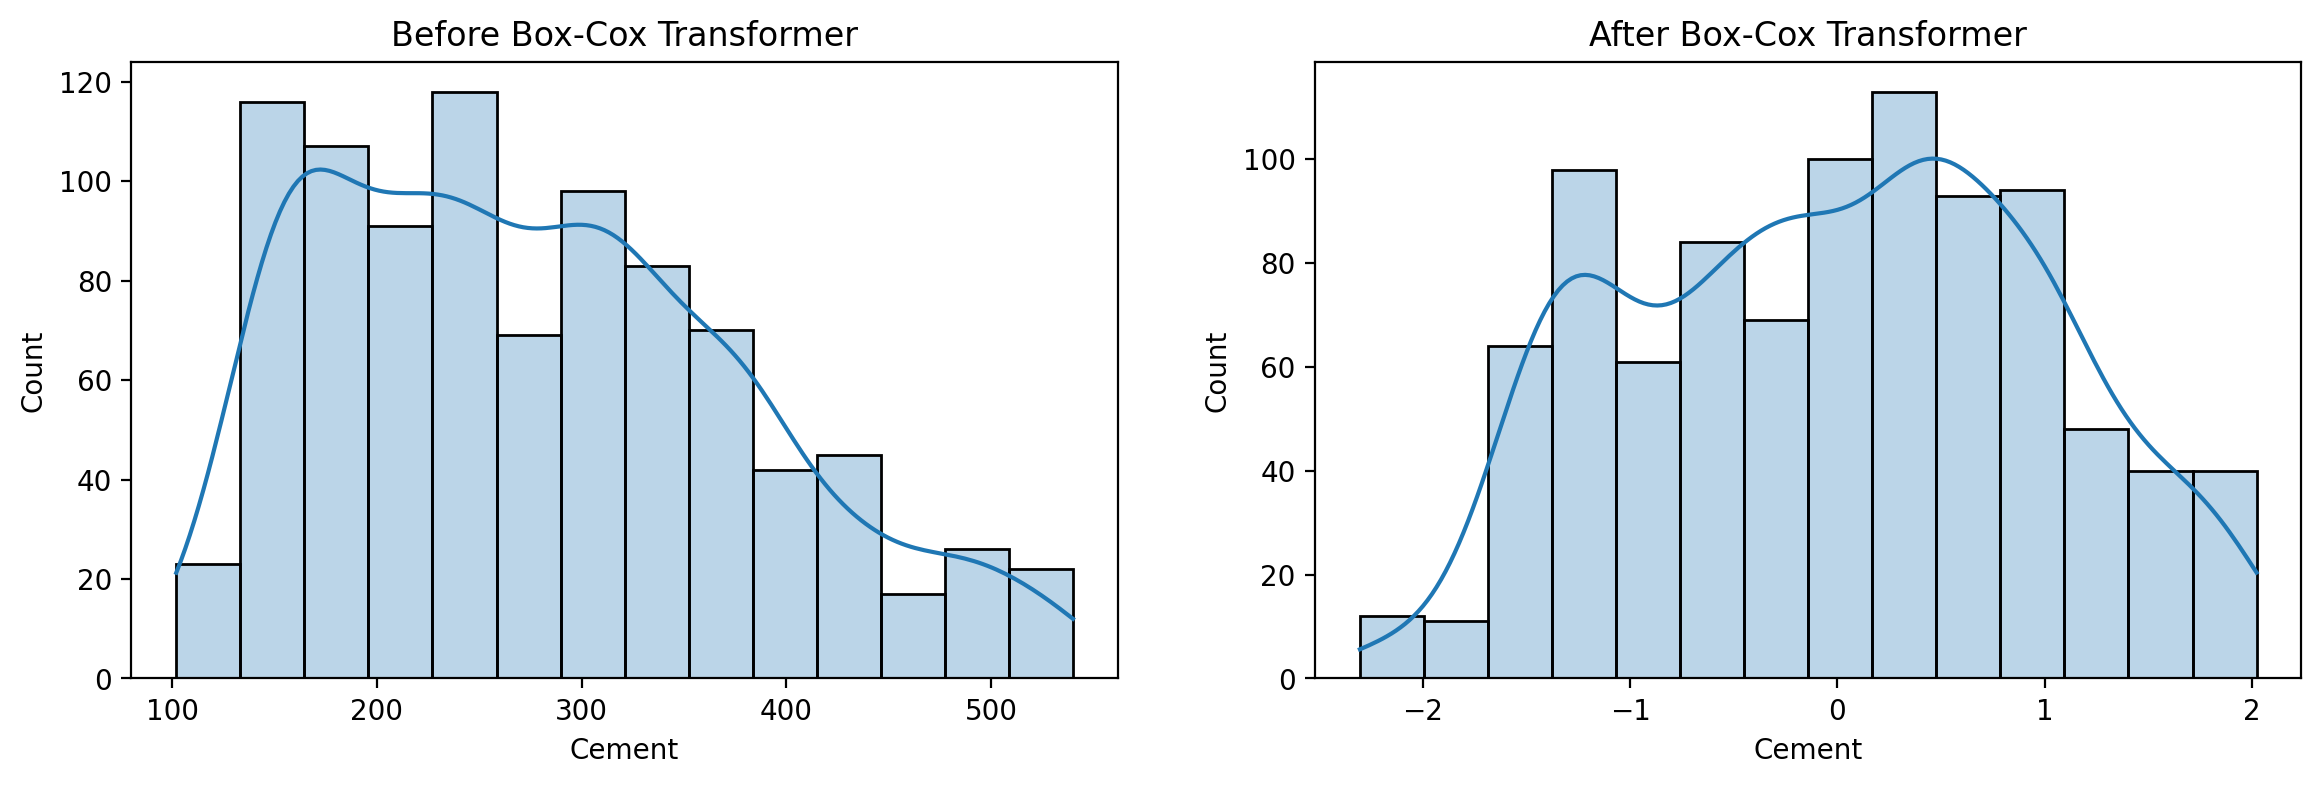

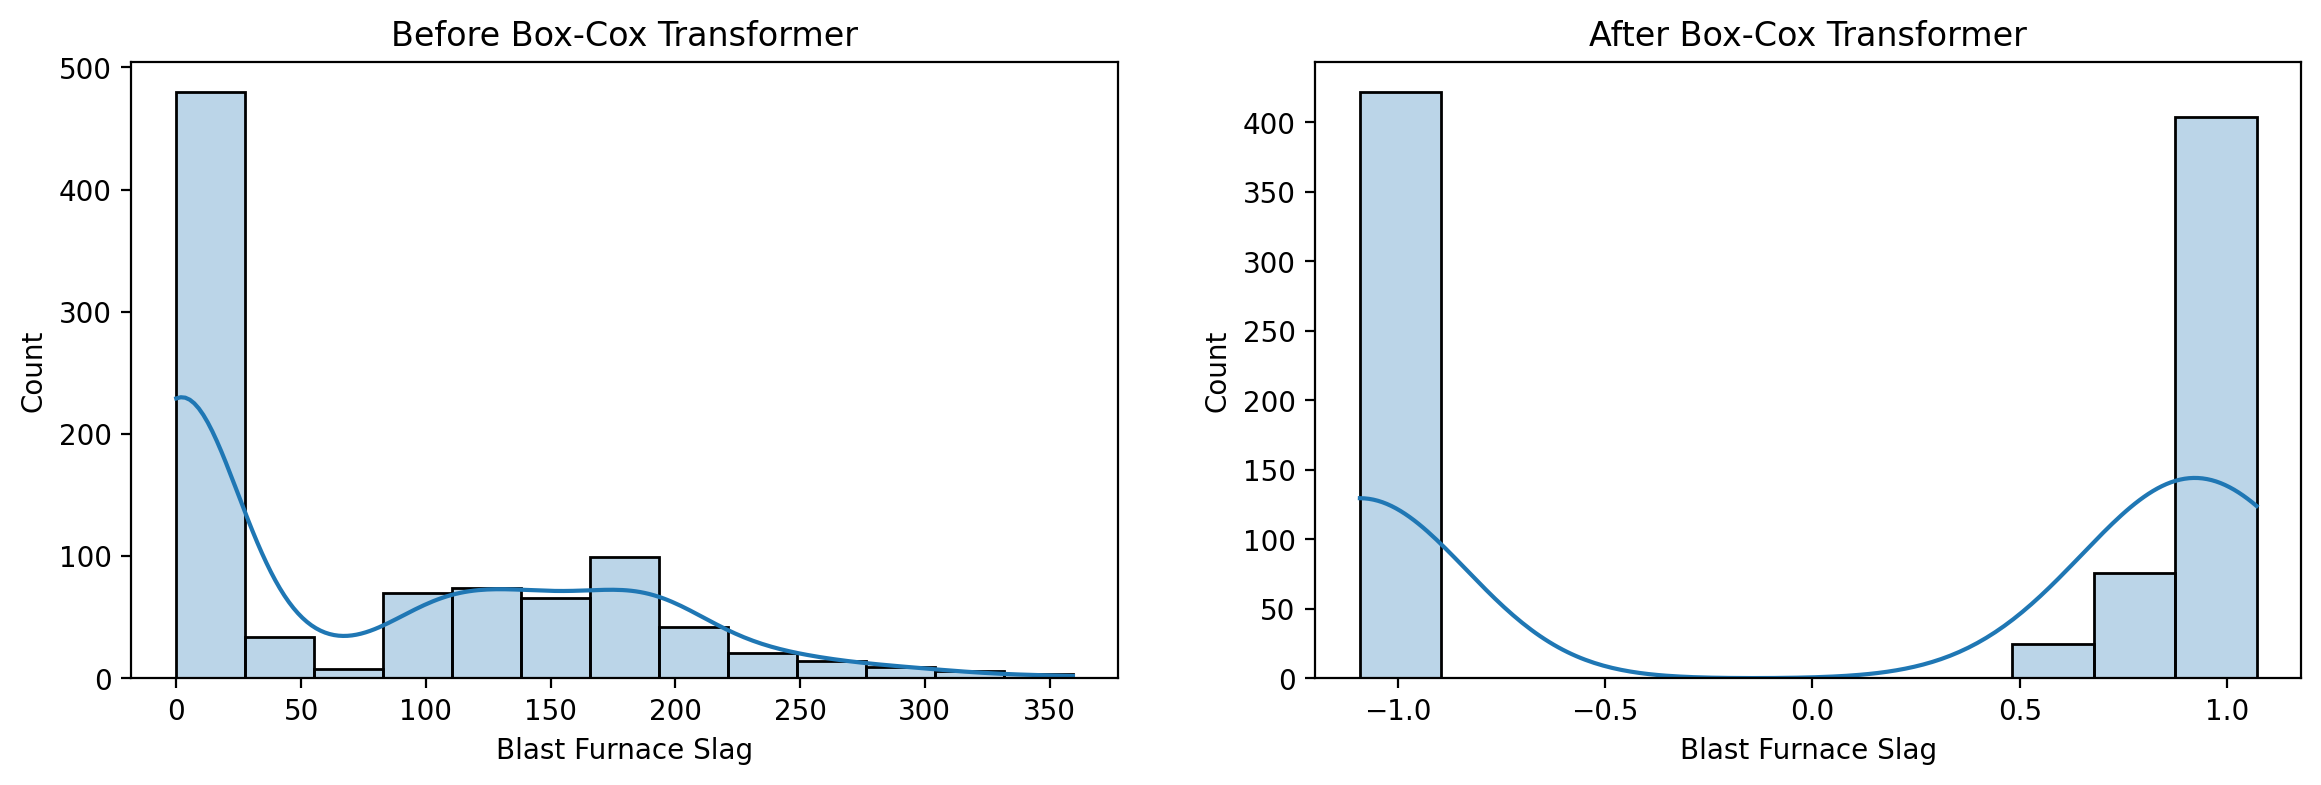

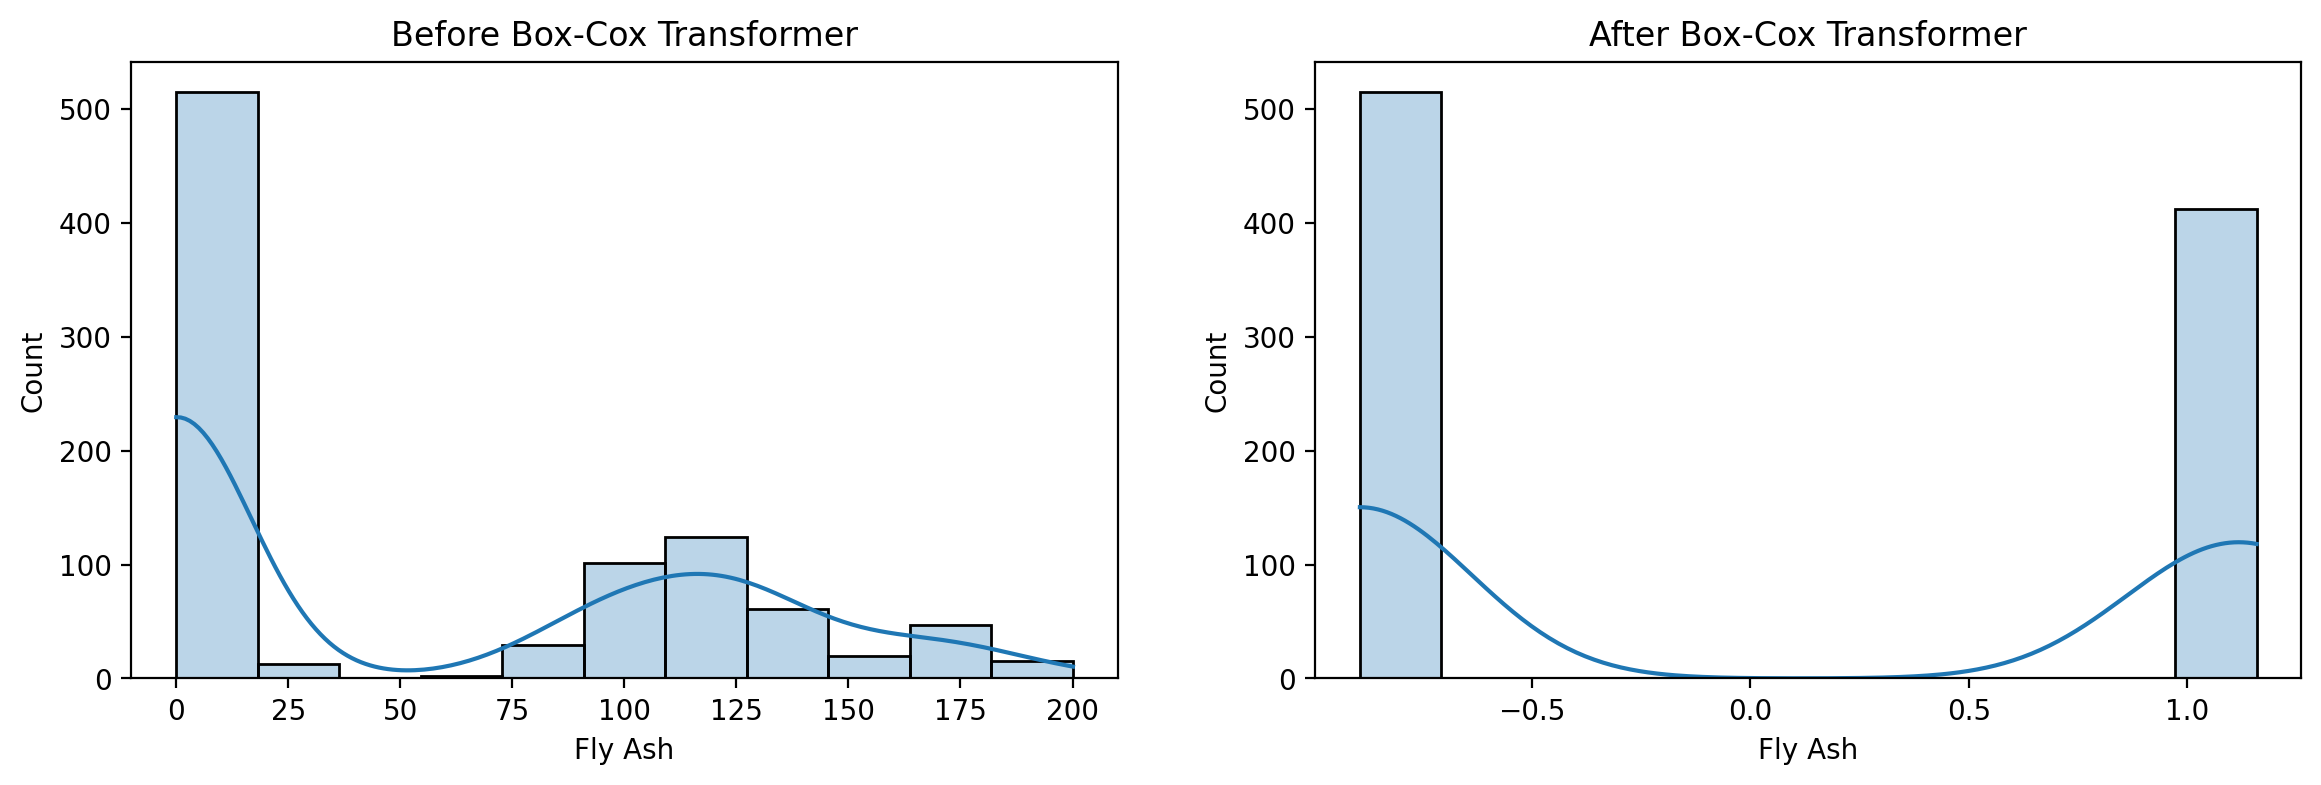

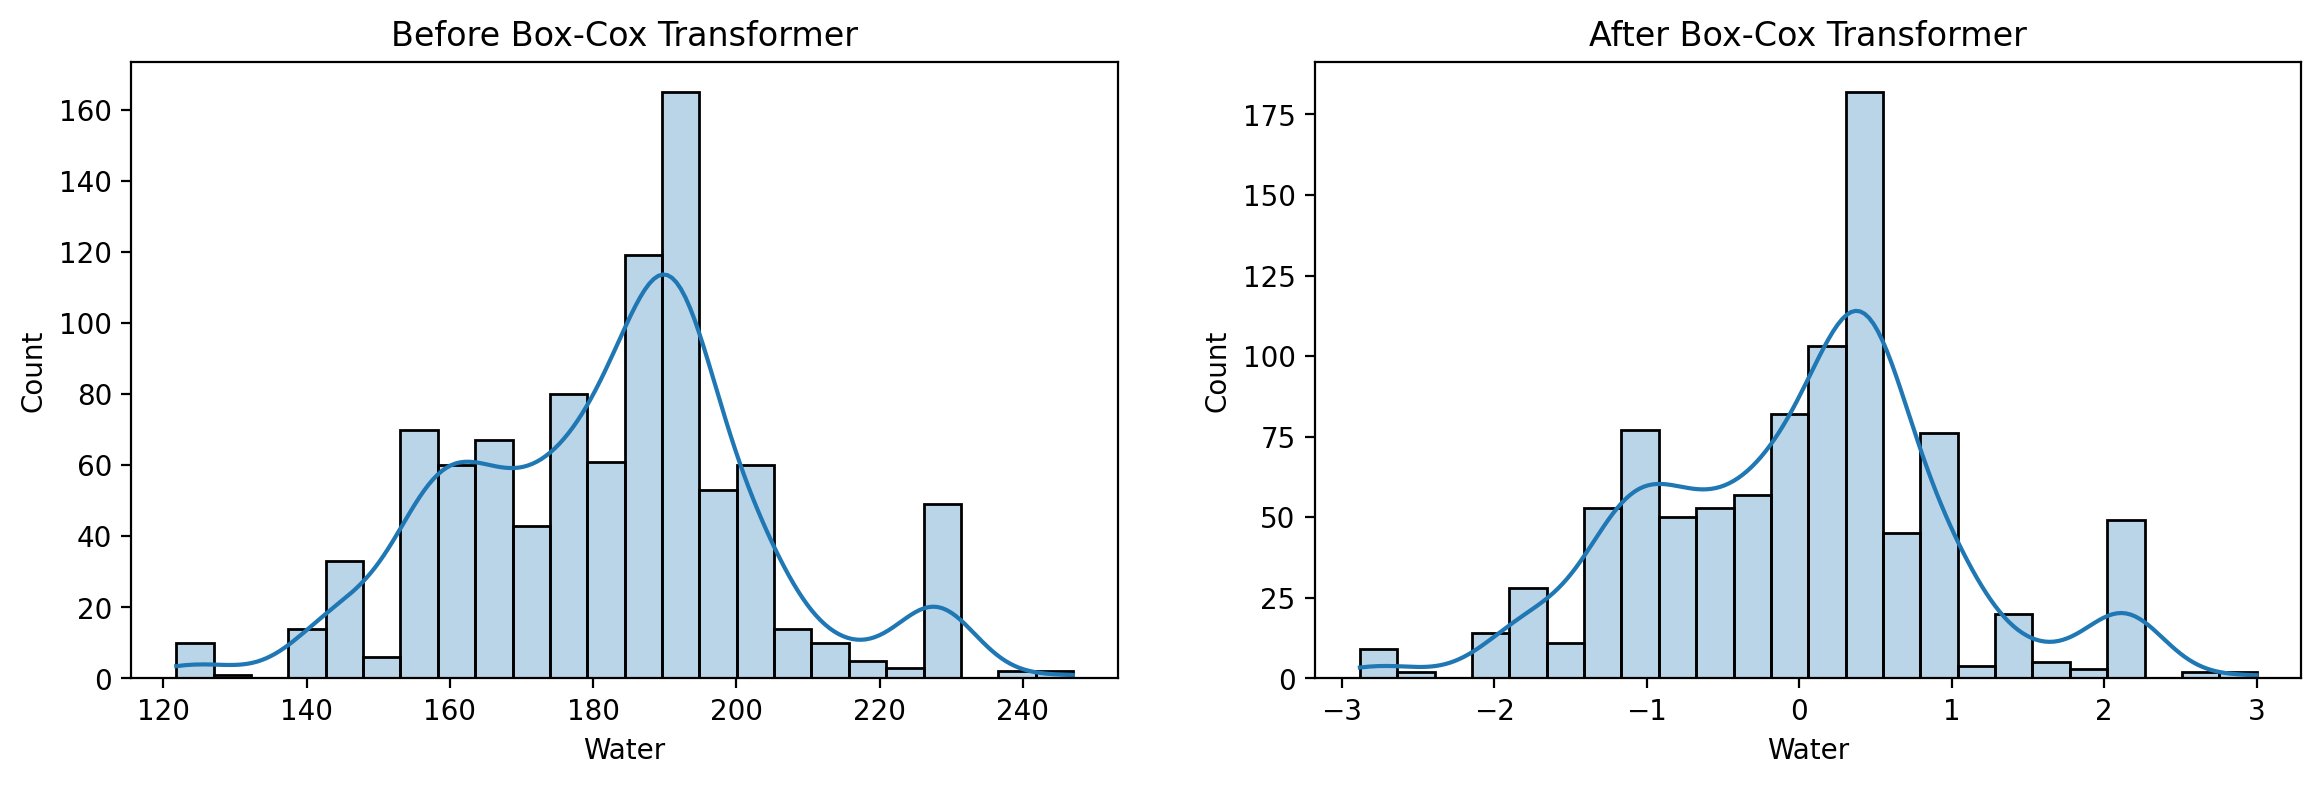

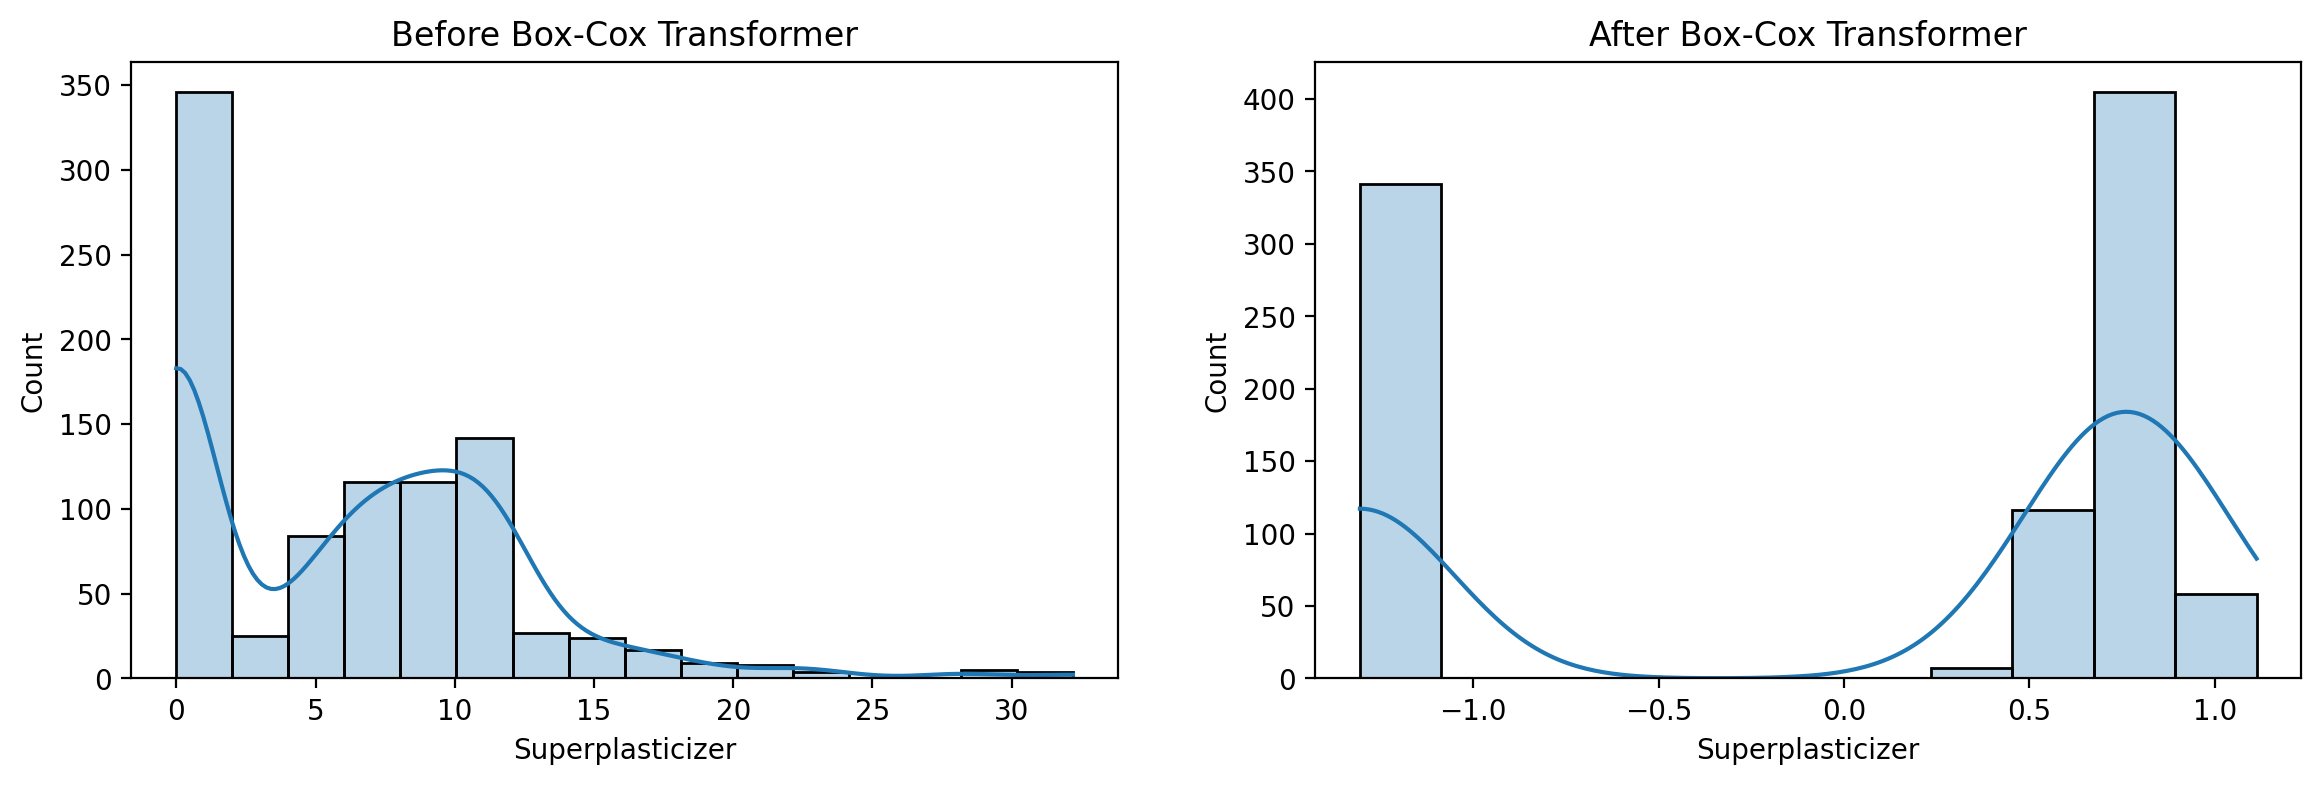

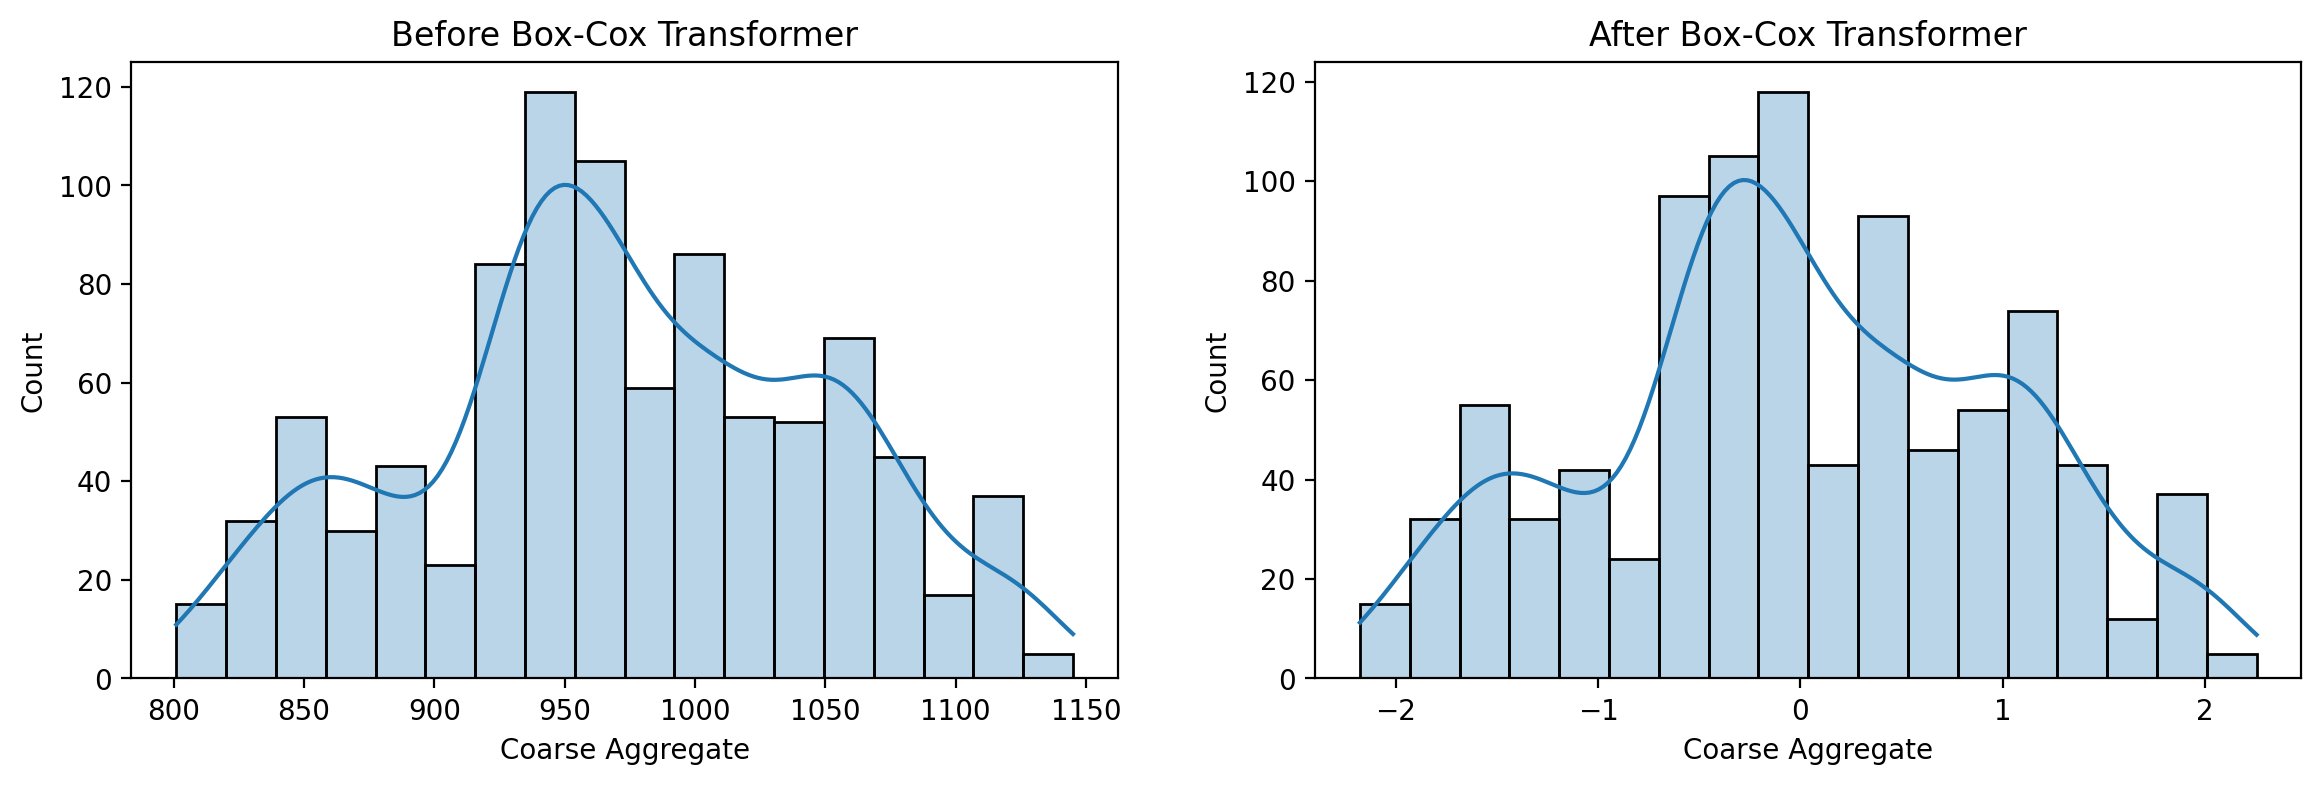

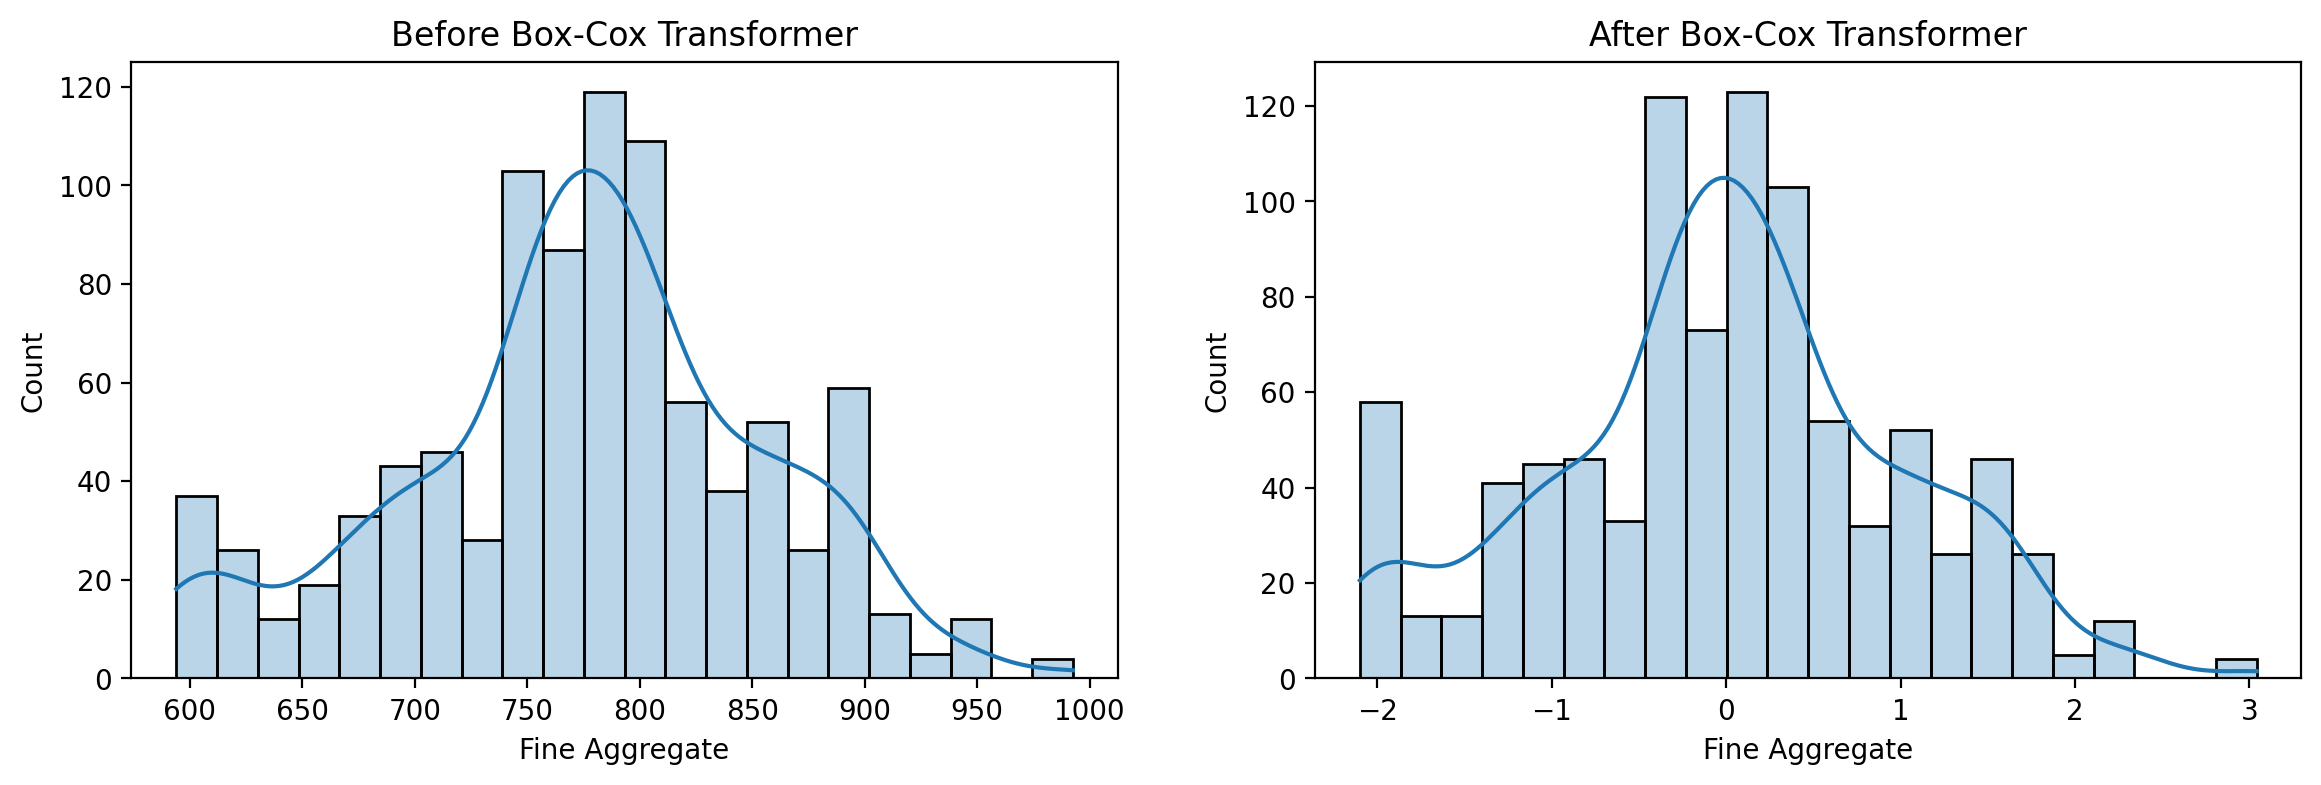

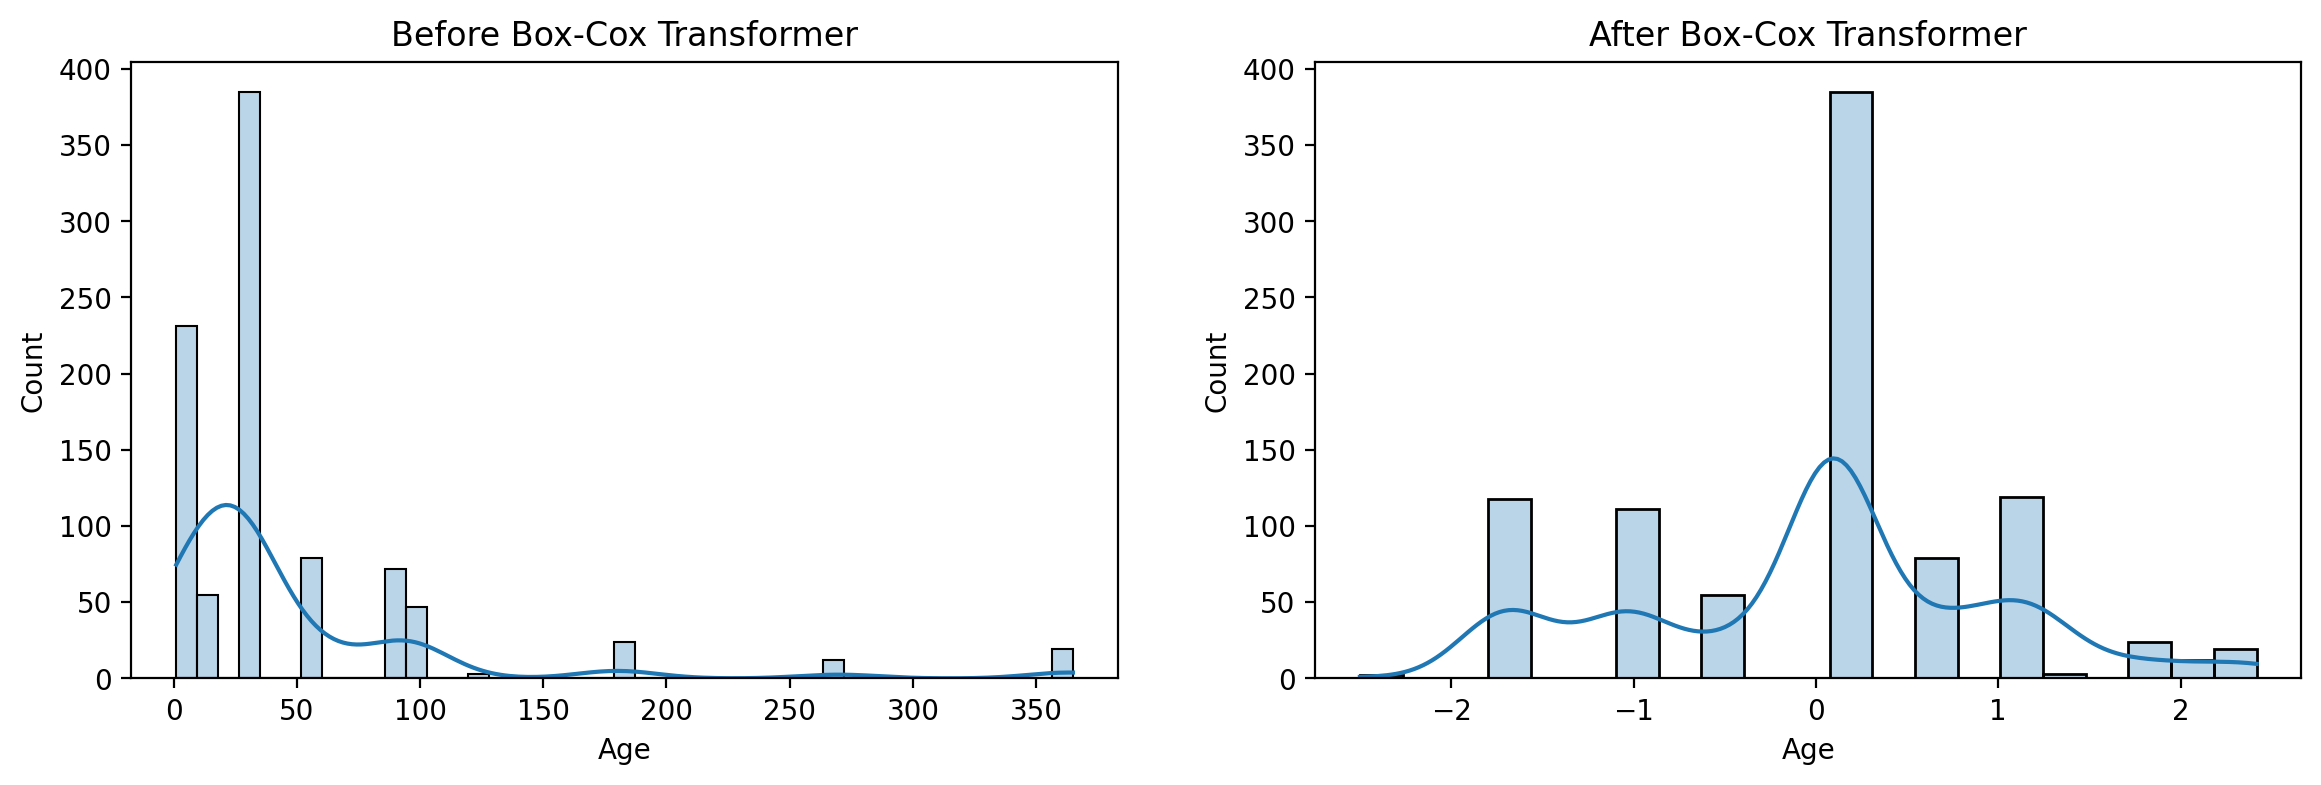

In [24]:
for col in x_train_trf.columns:
    
    plt.figure(figsize = (14,4),dpi = 200)
    plt.subplot(1,2,1)
    plt.title("Before Box-Cox Transformer")
    sns.histplot( x_train[col],kde = True,alpha = 0.3)
    
    plt.subplot(1,2,2)
    plt.title("After Box-Cox Transformer")
    sns.histplot( x_train_trf[col],kde = True,alpha = 0.3)
    

In [25]:
lr.fit(x_train_trf,y_train)

y_pred2 = lr.predict(x_test_trf)
r2_score(y_test,y_pred2)*100

81.37937400639225

In [26]:
# Applying Yeo-Johnson Transform

pt = PowerTransformer(method = "yeo-johnson")
pt.fit(x_train)
x_train_trf = pt.transform(x_train)
x_test_trf = pt.transform(x_test)

x_train_trf = pd.DataFrame(x_train_trf,columns = x_train.columns)
x_test_trf = pd.DataFrame(x_test_trf,columns = x_test.columns)

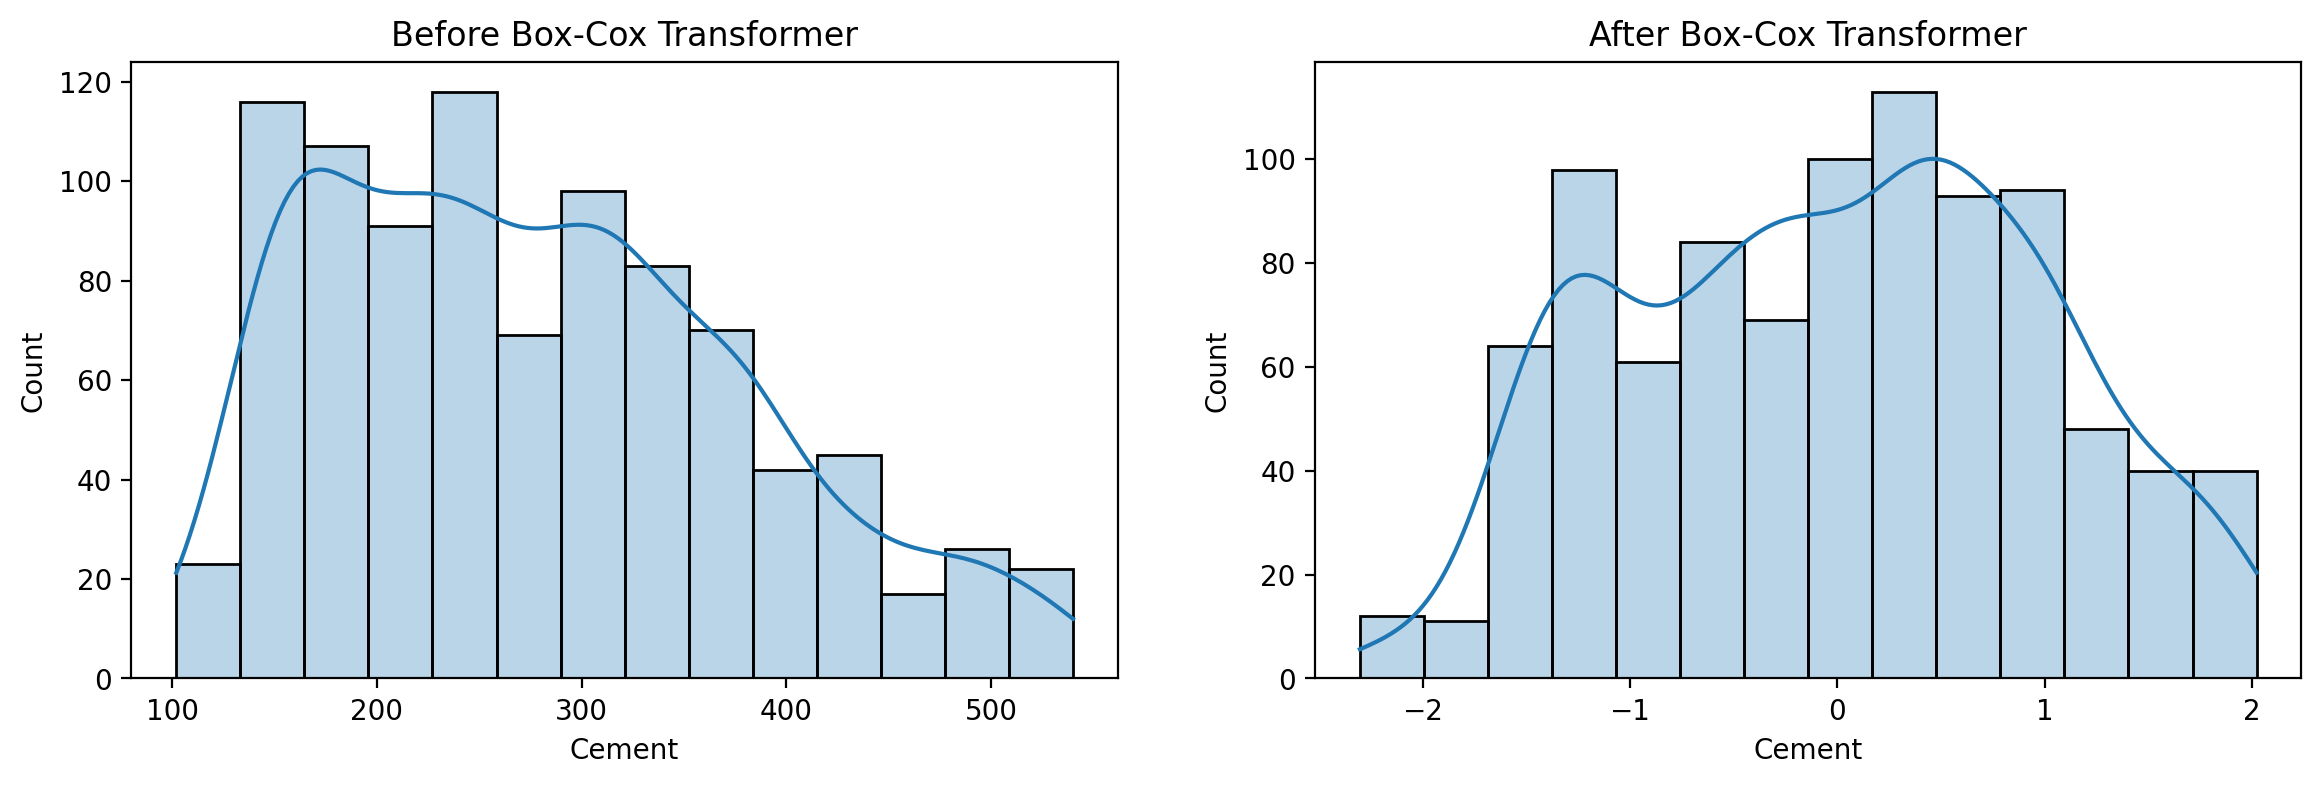

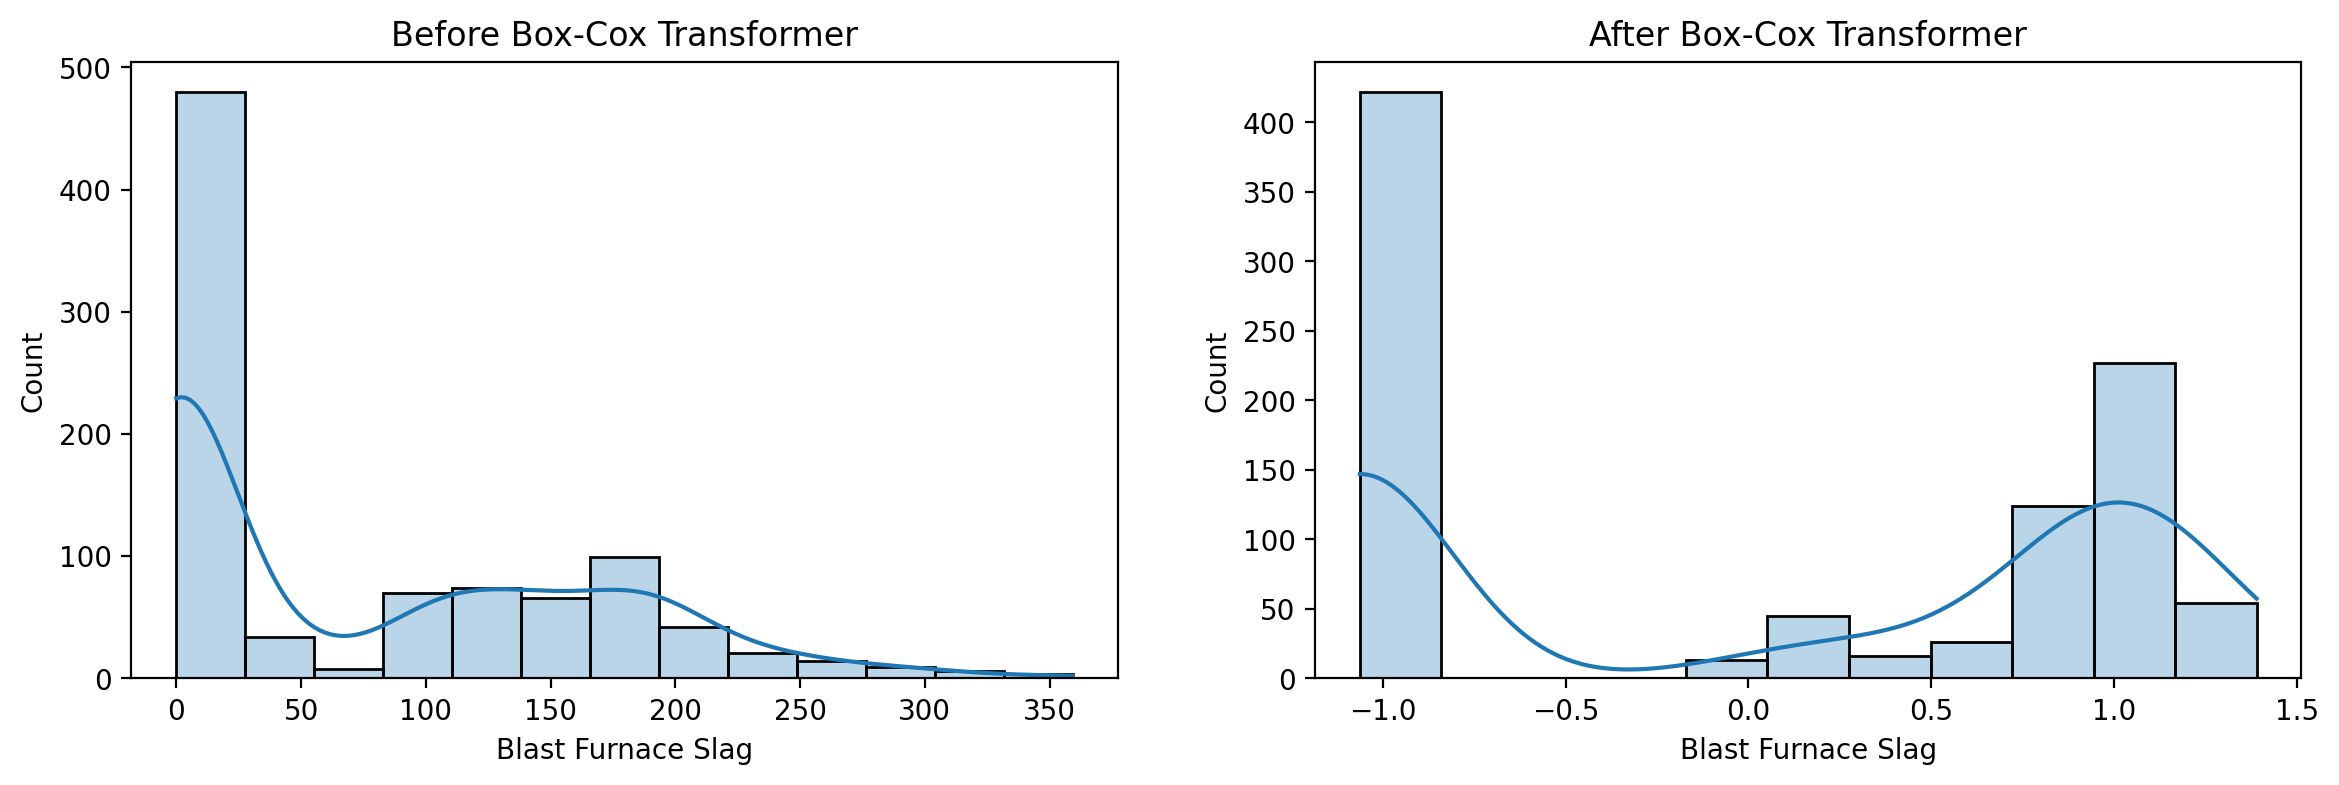

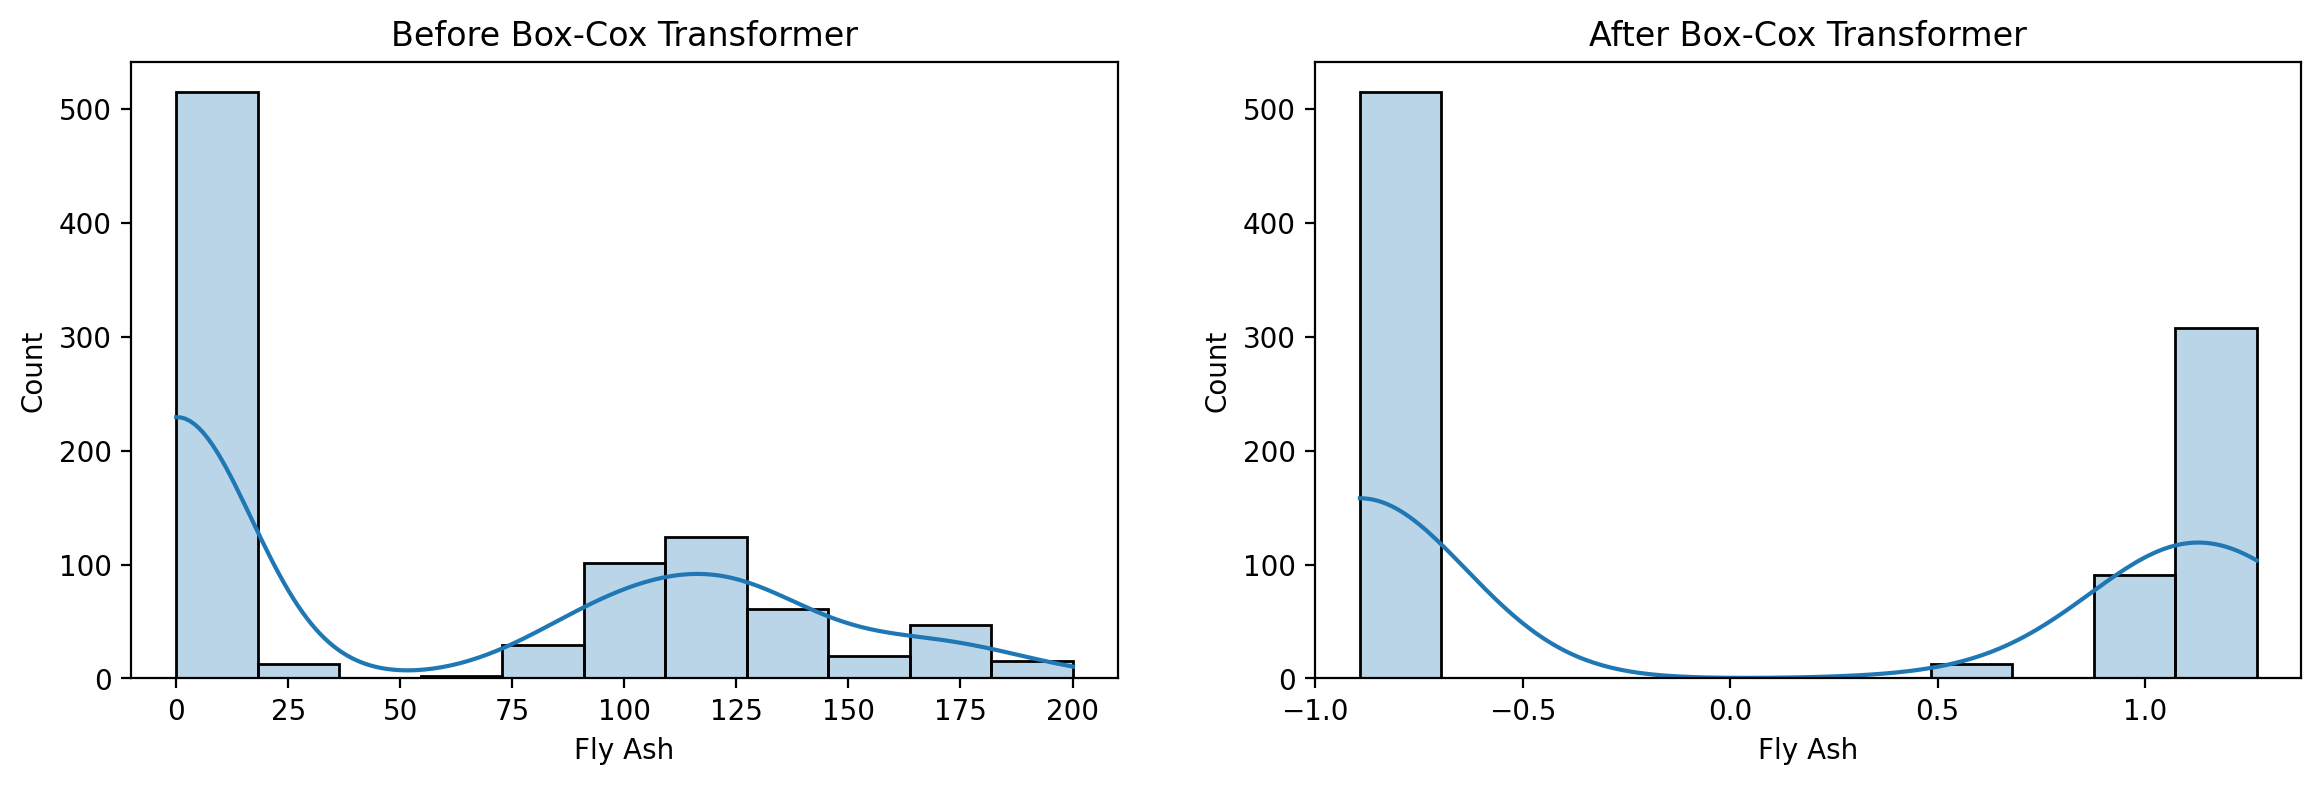

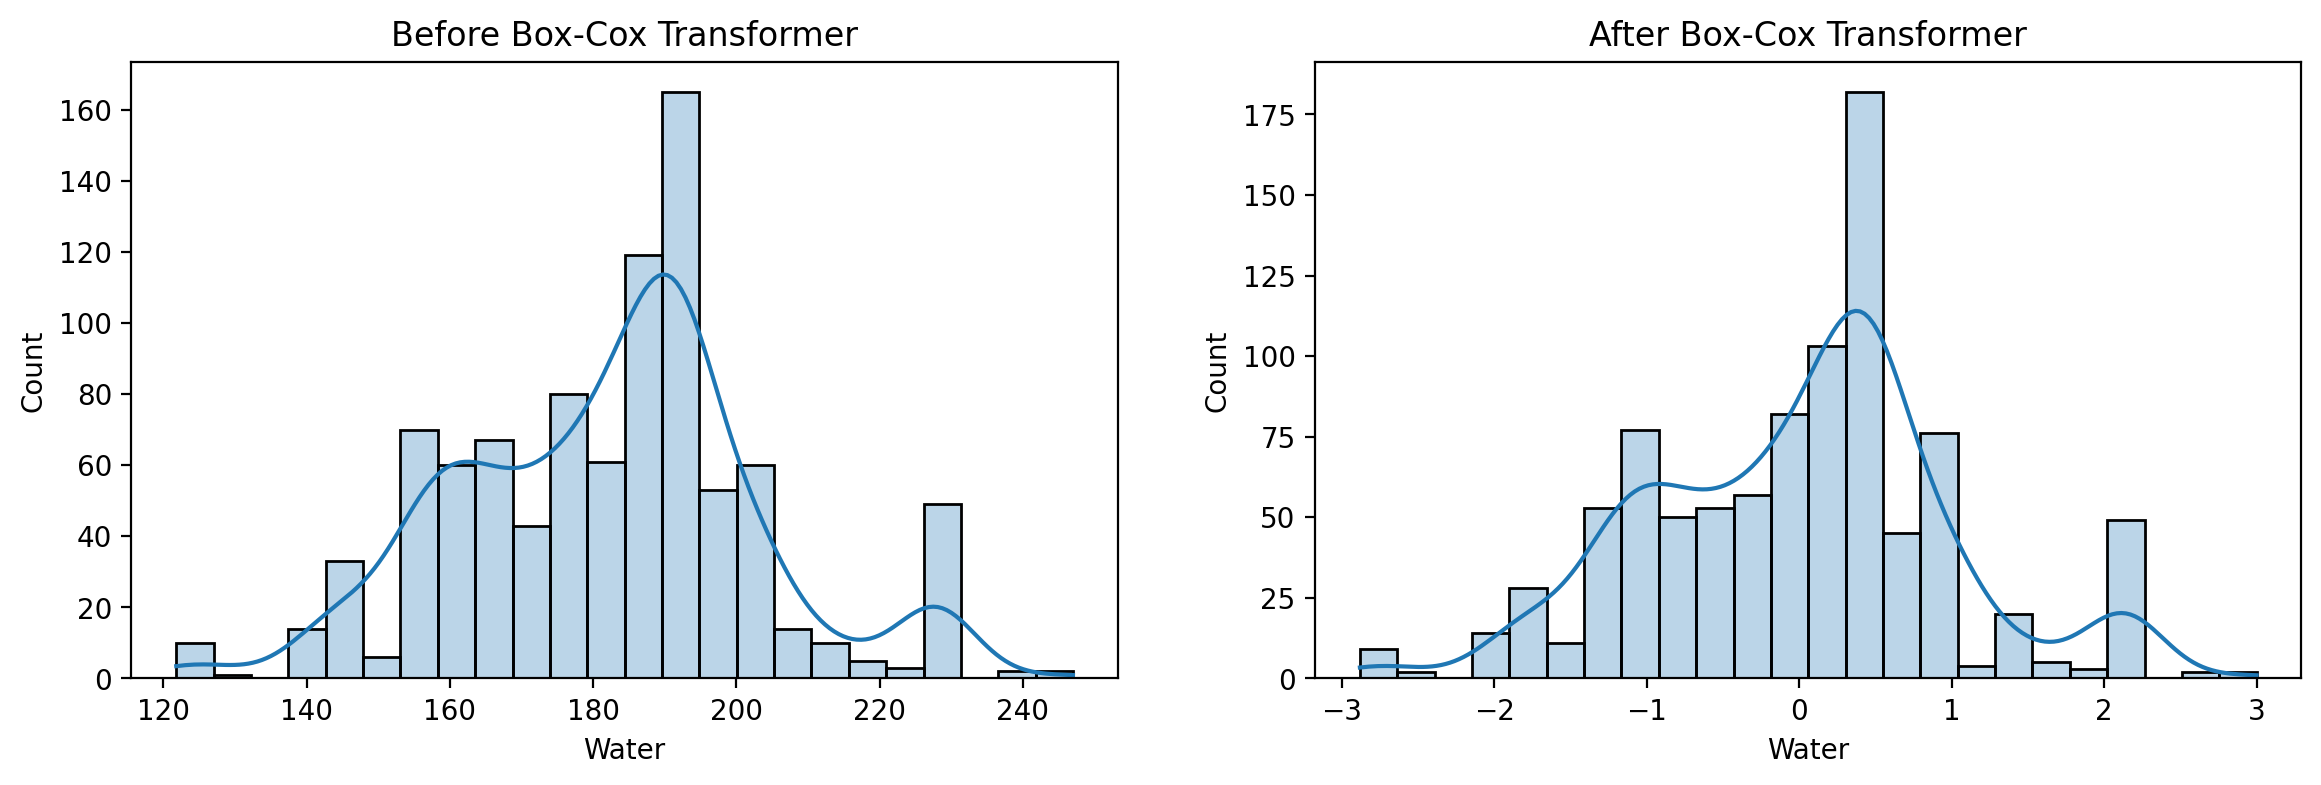

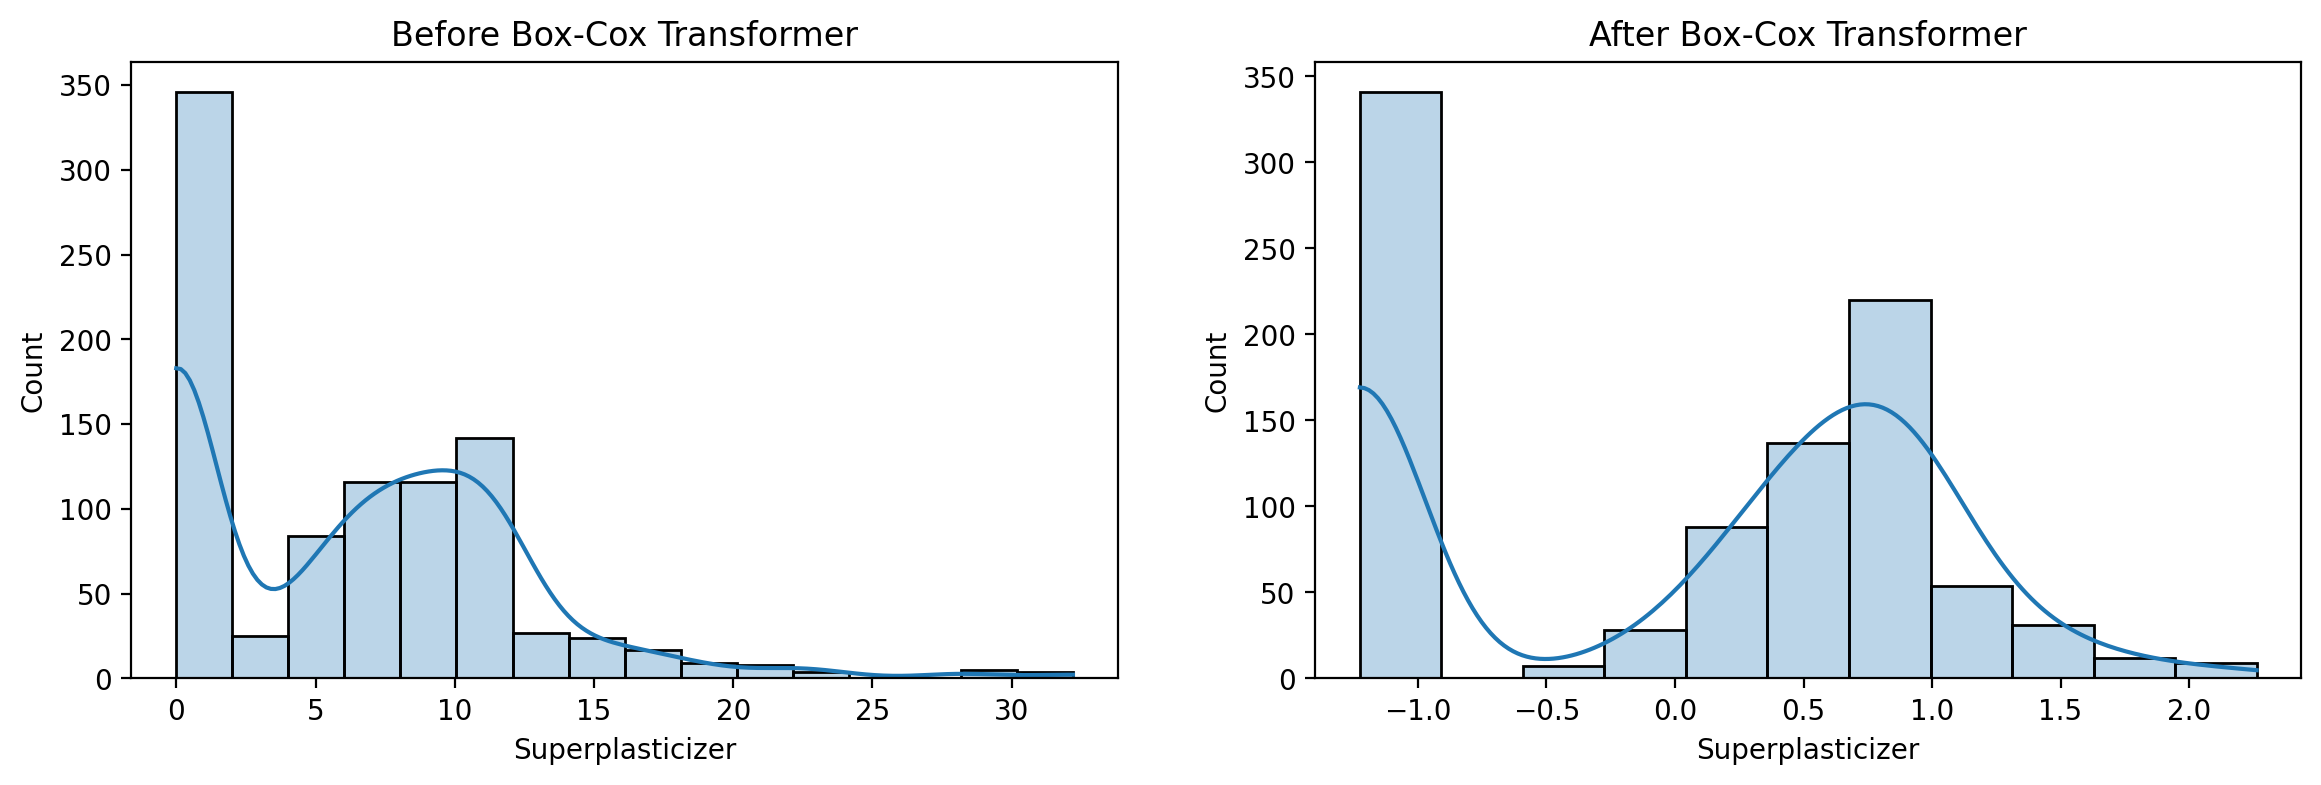

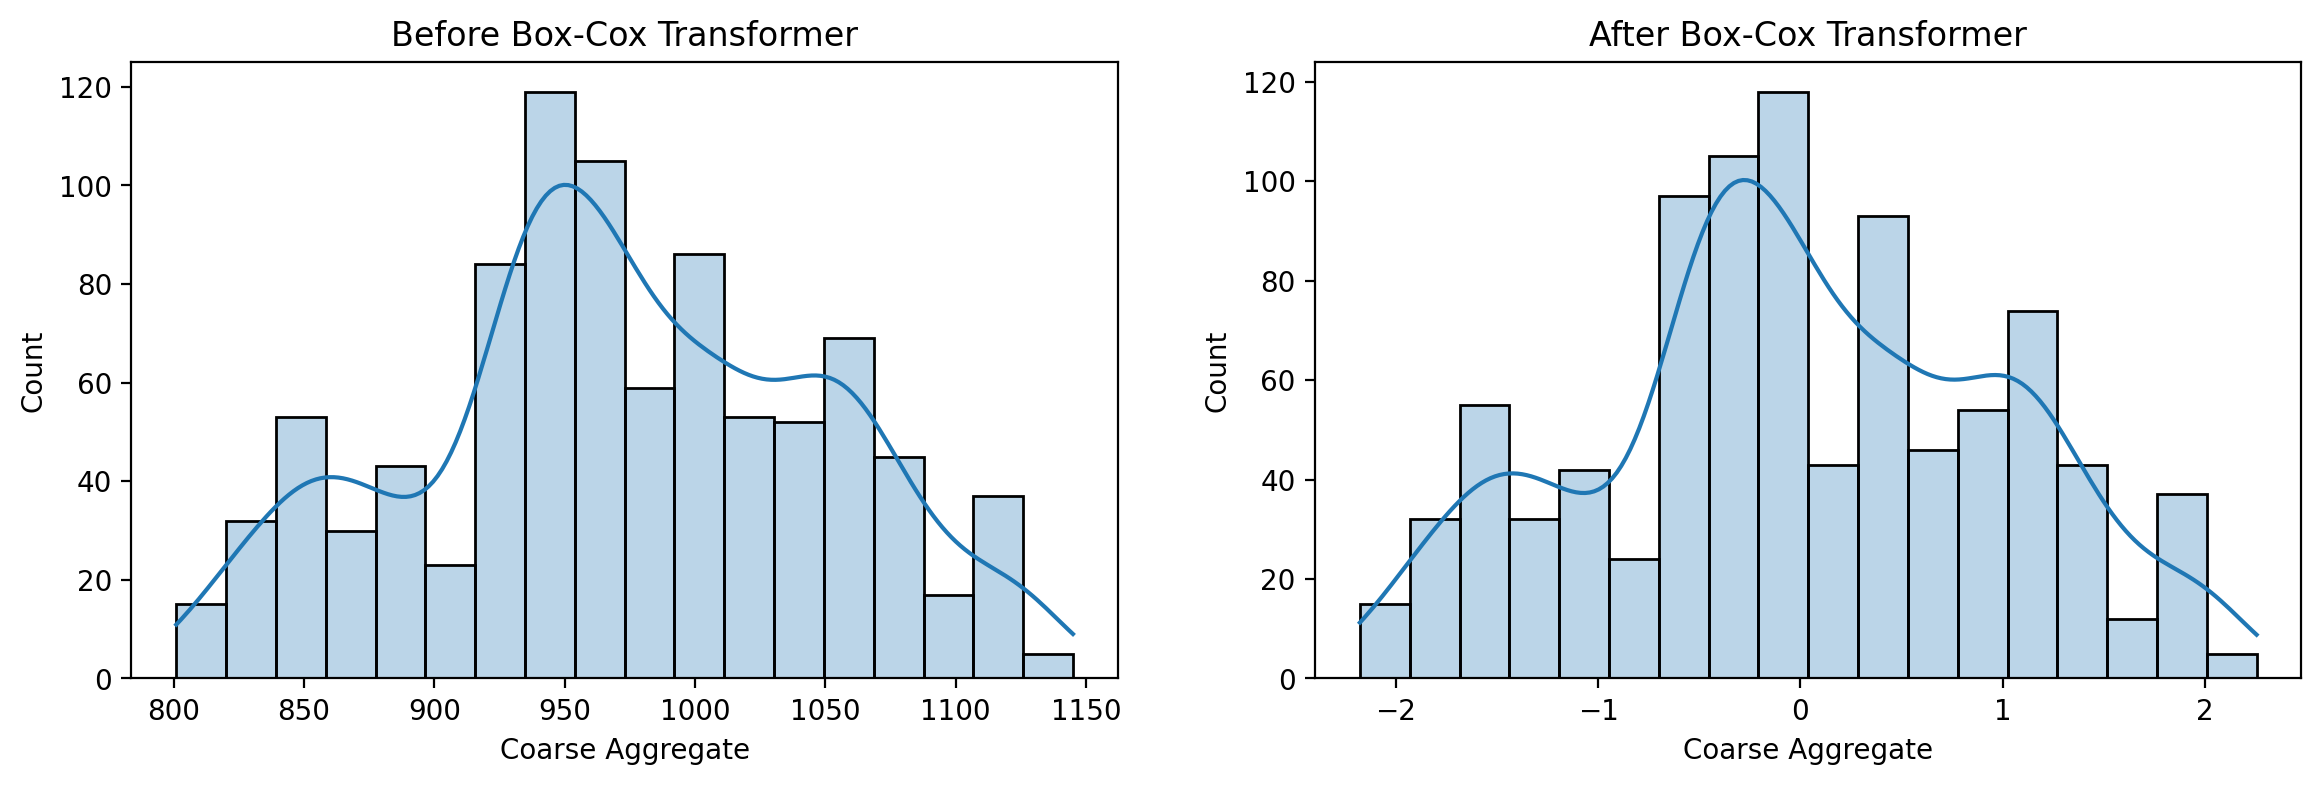

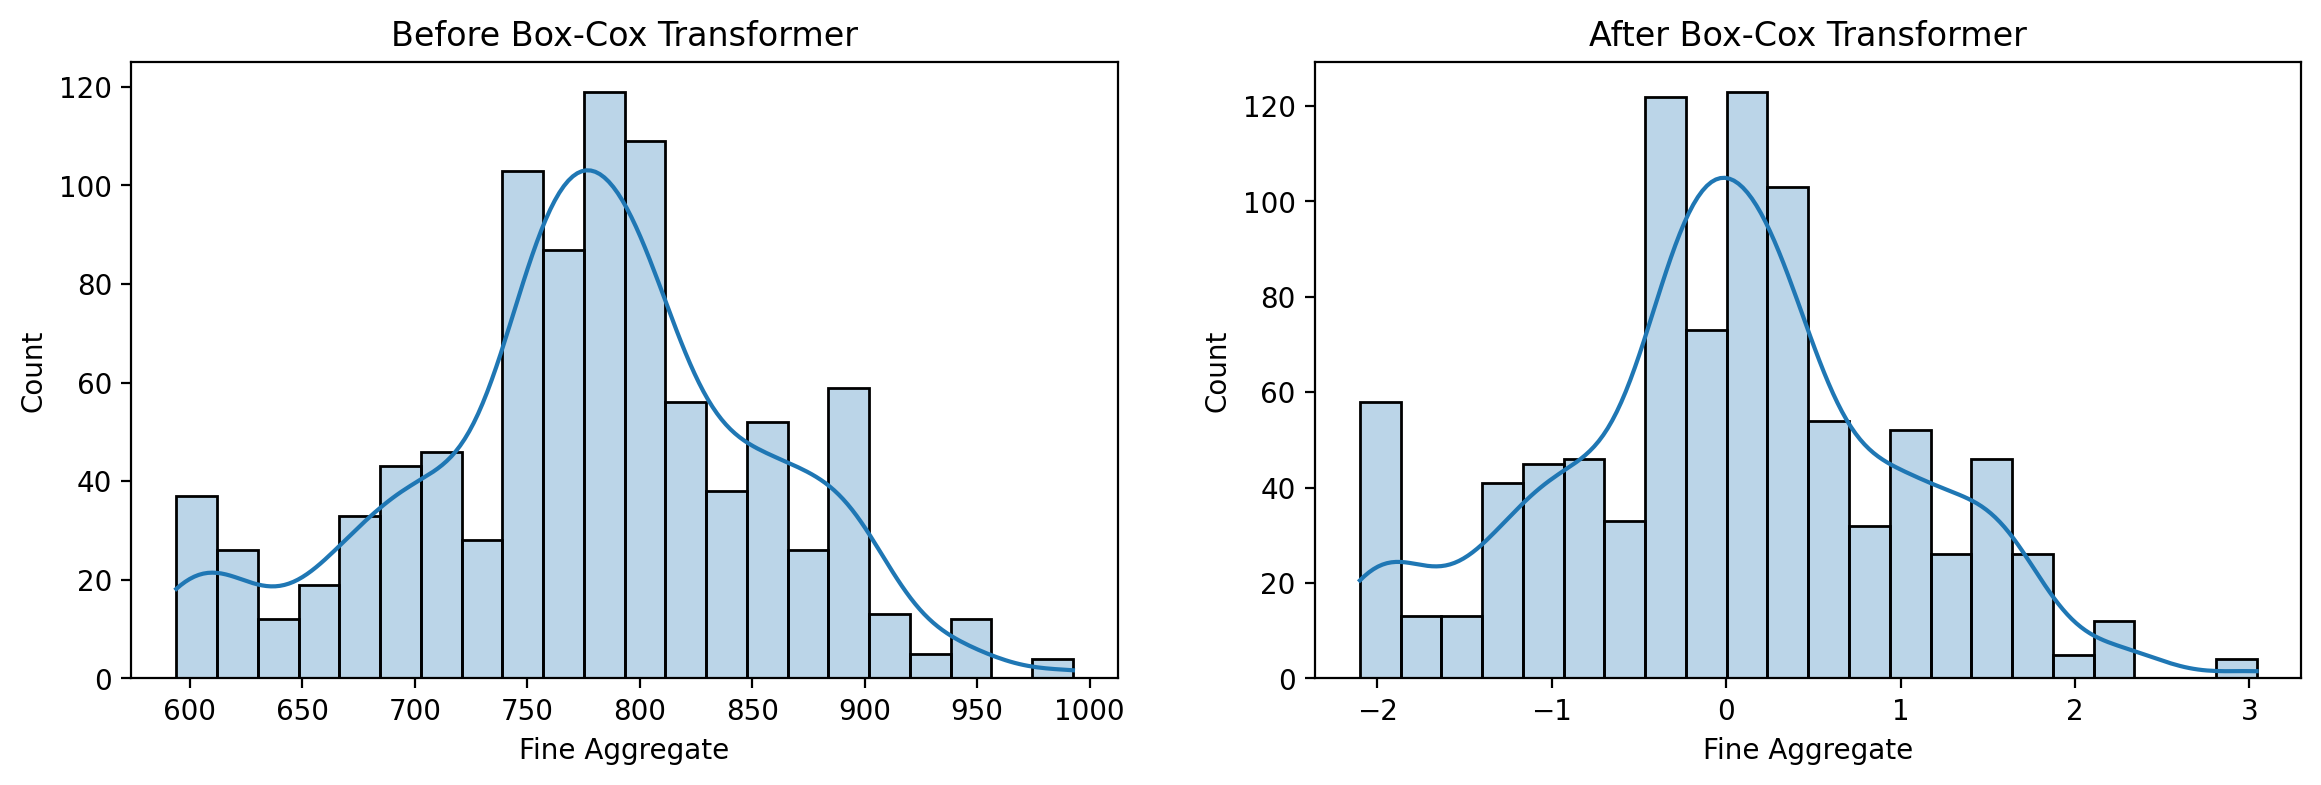

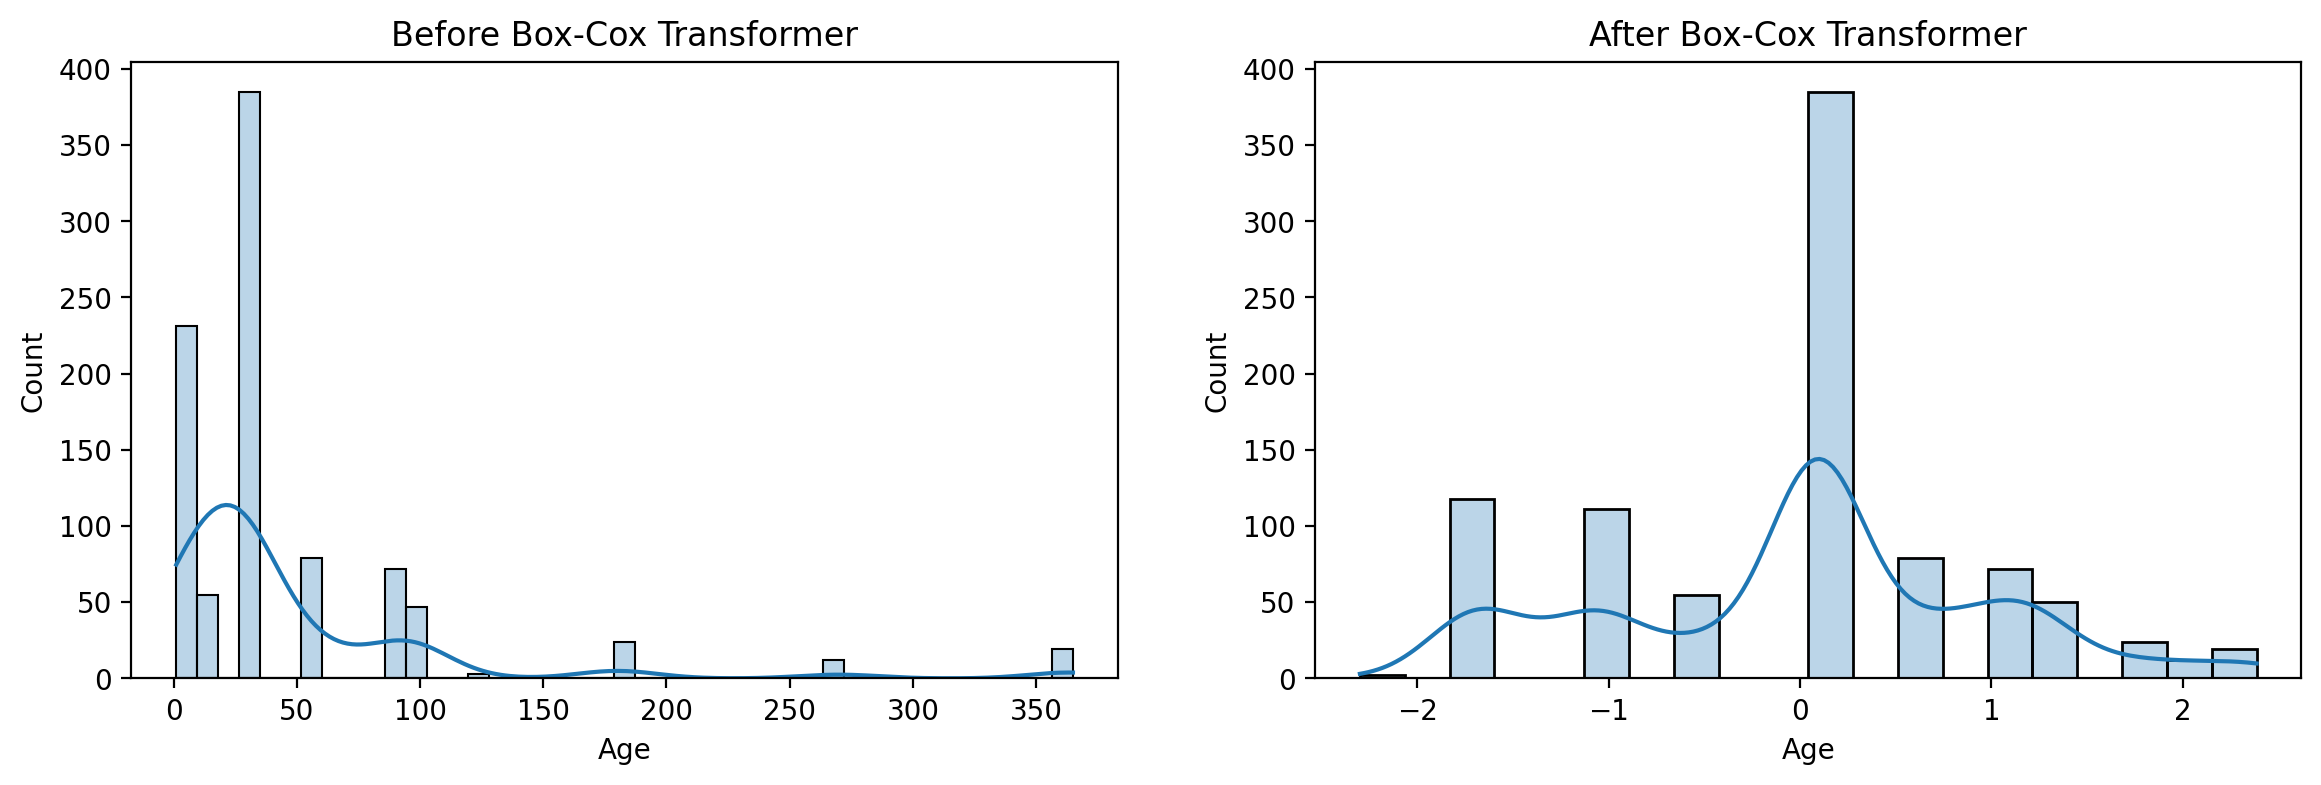

In [27]:
for col in x_train_trf.columns:
    
    plt.figure(figsize = (14,4),dpi = 200)
    plt.subplot(1,2,1)
    plt.title("Before Box-Cox Transformer")
    sns.histplot( x_train[col],kde = True,alpha = 0.3)
    
    plt.subplot(1,2,2)
    plt.title("After Box-Cox Transformer")
    sns.histplot( x_train_trf[col],kde = True,alpha = 0.3)
    

In [28]:
lr.fit(x_train_trf,y_train)

y_pred2 = lr.predict(x_test_trf)
r2_score(y_test,y_pred2)*100

81.86284017766148